### Import libraries

In [1]:
import re
import copy
import random
import warnings
import logging

import tqdm
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from xgboost import XGBClassifier

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

logging.basicConfig(level=logging.DEBUG)
warnings.filterwarnings('ignore')  

random.seed(42)
pd.set_option('display.max_columns',None)



Function to draw histogram and QQ plots

In [2]:
def diagnostic_plots(df, variable):
    print(df[variable].skew())
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm",
    plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

### Exploratory data analysis

In [3]:
df = pd.read_csv('DS Assessment Task 2024v2 - Dataset.csv', sep = ';')
df

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,RTPPriceType,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
0,0,3,0.00,0,0.000000,13,2023-09-04,SQ301,44.28,4,24,BR31,0,0,0,44.28,NaN,799.00,NEW_BUSINESS,2,11.0,108-000-518-493,NaN,0.000000,QUO - ASIS FEE,0.055419
1,0,38,1659.43,11,0.647059,4,2023-10-09,CQ9R1,114.00,175,12,CM96,13,17,8,119.76,NaN,750.00,NEW_BUSINESS,0,707.0,351-036-478-118,NaN,0.050526,QUO - ASIS FEE,0.152000
2,1,61,0.00,0,0.000000,4,2023-02-14,SQ9R1,90.00,77,12,CR00,4,4,0,90.00,NaN,139.00,NEW_BUSINESS,0,783.0,351-025-421-456,NaN,0.000000,QUO - ASIS FEE,0.647482
3,0,7,84.65,2,0.500000,4,2024-01-15,RR4Q1,70.80,118,12,RH117,4,4,7,85.92,NaN,200.00,NEW_BUSINESS,6,1461.0,170-028-720-932,0.28,0.213559,QUO - MODEL Q,0.354000
4,0,7,421.66,4,1.000000,4,2023-06-14,NaN,70.80,80,12,BB50,1,4,4,70.80,NaN,250.00,NEW_BUSINESS,6,1873.0,034-020-305-517,NaN,0.000000,QUO - ASIS FEE,0.283200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,7,194.00,2,0.333333,4,2023-04-28,RR191,70.80,314,12,BS57,5,6,4,51.00,NaN,150.00,NEW_BUSINESS,0,1095.0,045-000-420-392,NaN,-0.279661,QUO - PRICE TEST,0.472000
49996,0,22,0.00,0,0.000000,12,2024-02-22,RR9R1,86.52,104,12,BT513,0,0,0,82.56,NaN,435.00,NEW_BUSINESS,0,549.0,351-043-372-274,0.05,-0.045770,QUO - MODEL Q,0.198897
49997,0,6,0.00,0,0.000000,4,2023-09-05,SQ9R1,97.20,327,24,OX46,2,3,1,92.76,NaN,650.00,NEW_BUSINESS,6,1826.0,351-034-803-464,0.28,-0.045679,QUO - MODEL Q,0.149538
49998,1,53,0.00,0,0.000000,4,2023-05-31,SQ9R1,64.68,100,12,SG11,5,5,0,64.68,NaN,675.63,NEW_BUSINESS,0,30.0,351-030-313-705,NaN,0.000000,QUO - ASIS FEE,0.095733


In [4]:
df.shape

(50000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Acc                               50000 non-null  int64  
 1   ApplianceCode                     50000 non-null  int64  
 2   ClaimAmount5YearTotal             50000 non-null  float64
 3   ClaimPast5YearCount               50000 non-null  int64  
 4   ClaimsToPlansRatio                50000 non-null  float64
 5   ClientAccountDesc                 50000 non-null  int64  
 6   CurrentDate                       50000 non-null  object 
 7   DNISCode                          47384 non-null  object 
 8   Fee                               50000 non-null  float64
 9   ManufacturerBrandCode             50000 non-null  int64  
 10  ManufacturerGuaranteePartsMonths  50000 non-null  int64  
 11  OfferPostcodeSector               50000 non-null  object 
 12  Plan

Check for missing values in each column

In [6]:
df.isnull().sum()

Acc                                     0
ApplianceCode                           0
ClaimAmount5YearTotal                   0
ClaimPast5YearCount                     0
ClaimsToPlansRatio                      0
ClientAccountDesc                       0
CurrentDate                             0
DNISCode                             2616
Fee                                     0
ManufacturerBrandCode                   0
ManufacturerGuaranteePartsMonths        0
OfferPostcodeSector                     0
PlanLiveCount                           0
PlansAcceptedPast5YearCount             0
PlansCancelledPast5YearCount            0
Premium                                 0
PrevRTPPriceType                    42384
PurchasePrice                           0
RTPPriceType                            0
SchemeTypeName                          0
age_appliance_days                      0
offerreferencenumber                    0
predictedconversionrate             29765
price_diff                        

Get summary statistics of columns

In [7]:
df.describe()

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PurchasePrice,SchemeTypeName,age_appliance_days,predictedconversionrate,price_diff,relFee
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,20235.000000,50000.000000,50000.000000
mean,0.320060,25.461720,482.023676,3.624100,0.620785,6.263220,88.949954,154.027540,35.122080,2.039000,4.972200,4.045680,88.367834,423.077225,2.05850,1127.957920,0.306195,0.009127,0.438764
std,0.466504,18.886452,1004.756832,6.622039,1.031651,3.714492,30.637436,90.164807,40.573411,3.162518,8.737871,8.107063,28.804521,246.131828,2.65218,837.742427,0.202734,0.120338,3.281086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.680000,0.000000,12.000000,0.000000,0.000000,0.000000,10.680000,1.000000,0.00000,0.000000,0.000000,-0.300000,0.010173
25%,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,66.000000,76.000000,12.000000,0.000000,0.000000,0.000000,70.560000,300.000000,0.00000,382.000000,0.130000,-0.035802,0.170529
50%,0.000000,22.000000,85.030000,1.000000,0.240000,4.000000,86.520000,135.000000,12.000000,1.000000,2.000000,1.000000,86.520000,349.000000,0.00000,1095.000000,0.280000,0.000000,0.244000
75%,1.000000,38.000000,539.027500,5.000000,1.000000,11.000000,110.400000,228.000000,24.000000,3.000000,6.000000,5.000000,103.200000,500.000000,6.00000,1826.000000,0.440000,0.050769,0.315558
max,1.000000,70.000000,24325.660000,122.000000,23.000000,20.000000,150.000000,328.000000,120.000000,222.000000,248.000000,228.000000,150.000000,1200.000000,6.00000,3285.000000,0.990000,0.300000,150.000000


In [8]:
df['Acc'].value_counts()

Acc
0    33997
1    16003
Name: count, dtype: int64

In [9]:
df['DNISCode'].value_counts()

DNISCode
SQ9R1    10309
QQ9R1     9691
RR4Q1     6983
CQ9R1     5819
OQ4Q1     3357
         ...  
RE9F1        1
SQ1C1        1
SQ152        1
CQ311        1
NNFI1        1
Name: count, Length: 120, dtype: int64

In [10]:
df['ManufacturerBrandCode'].value_counts()

ManufacturerBrandCode
135    7337
261    4547
30     3860
148    3533
39     3125
       ... 
178       1
234       1
285       1
7         1
26        1
Name: count, Length: 329, dtype: int64

In [11]:

df['ManufacturerGuaranteePartsMonths'].value_counts()

ManufacturerGuaranteePartsMonths
12     27805
24     12440
120     9126
36       374
60       255
Name: count, dtype: int64

In [12]:
df['OfferPostcodeSector'].value_counts()

OfferPostcodeSector
E125     83
B95      54
CR00     49
LE55     47
EN36     47
         ..
SP117     1
S720      1
WR89      1
MK93      1
TS118     1
Name: count, Length: 8272, dtype: int64

In [13]:
df['PrevRTPPriceType'].value_counts()



PrevRTPPriceType
NEW_BUSINESS           5307
CAMPAIGN               1837
PRODUCT_REPLACEMENT     326
RETENTION               146
Name: count, dtype: int64

In [14]:

df['RTPPriceType'].value_counts()

RTPPriceType
NEW_BUSINESS    50000
Name: count, dtype: int64

In [15]:

df['offerreferencenumber'].value_counts()

offerreferencenumber
351-028-257-501    2
351-030-821-016    2
351-030-734-914    2
351-030-518-204    1
170-018-241-537    1
                  ..
351-035-595-948    1
351-033-890-402    1
170-020-375-726    1
351-043-670-392    1
194-004-320-460    1
Name: count, Length: 49997, dtype: int64

In [16]:
df['pricingversiondescription'].value_counts()

pricingversiondescription
QUO - ASIS FEE      21148
QUO - MODEL Q       20235
QUO - PRICE TEST     8617
Name: count, dtype: int64

In [17]:
df['CurrentDate'].value_counts()

CurrentDate
2023-01-23    264
2023-01-16    249
2023-01-09    234
2023-02-20    222
2023-02-08    217
             ... 
2024-02-18     15
2023-11-30     12
2024-01-23      6
2023-11-29      3
2023-12-26      1
Name: count, Length: 401, dtype: int64

In [18]:

df['SchemeTypeName'].value_counts()

SchemeTypeName
0    29070
6    13293
2     2008
5     1870
3     1866
1     1123
4      770
Name: count, dtype: int64

In [19]:
df['RTPPriceType'].value_counts()

RTPPriceType
NEW_BUSINESS    50000
Name: count, dtype: int64

In [20]:
# Drop column 'RTPPriceType' as it is constant
df.drop(['RTPPriceType'], axis=1, inplace=True)
df

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
0,0,3,0.00,0,0.000000,13,2023-09-04,SQ301,44.28,4,24,BR31,0,0,0,44.28,NaN,799.00,2,11.0,108-000-518-493,NaN,0.000000,QUO - ASIS FEE,0.055419
1,0,38,1659.43,11,0.647059,4,2023-10-09,CQ9R1,114.00,175,12,CM96,13,17,8,119.76,NaN,750.00,0,707.0,351-036-478-118,NaN,0.050526,QUO - ASIS FEE,0.152000
2,1,61,0.00,0,0.000000,4,2023-02-14,SQ9R1,90.00,77,12,CR00,4,4,0,90.00,NaN,139.00,0,783.0,351-025-421-456,NaN,0.000000,QUO - ASIS FEE,0.647482
3,0,7,84.65,2,0.500000,4,2024-01-15,RR4Q1,70.80,118,12,RH117,4,4,7,85.92,NaN,200.00,6,1461.0,170-028-720-932,0.28,0.213559,QUO - MODEL Q,0.354000
4,0,7,421.66,4,1.000000,4,2023-06-14,NaN,70.80,80,12,BB50,1,4,4,70.80,NaN,250.00,6,1873.0,034-020-305-517,NaN,0.000000,QUO - ASIS FEE,0.283200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,7,194.00,2,0.333333,4,2023-04-28,RR191,70.80,314,12,BS57,5,6,4,51.00,NaN,150.00,0,1095.0,045-000-420-392,NaN,-0.279661,QUO - PRICE TEST,0.472000
49996,0,22,0.00,0,0.000000,12,2024-02-22,RR9R1,86.52,104,12,BT513,0,0,0,82.56,NaN,435.00,0,549.0,351-043-372-274,0.05,-0.045770,QUO - MODEL Q,0.198897
49997,0,6,0.00,0,0.000000,4,2023-09-05,SQ9R1,97.20,327,24,OX46,2,3,1,92.76,NaN,650.00,6,1826.0,351-034-803-464,0.28,-0.045679,QUO - MODEL Q,0.149538
49998,1,53,0.00,0,0.000000,4,2023-05-31,SQ9R1,64.68,100,12,SG11,5,5,0,64.68,NaN,675.63,0,30.0,351-030-313-705,NaN,0.000000,QUO - ASIS FEE,0.095733


### Price elasticity of Model Test

Create function to calculate price elasticity

In [21]:
def calculate_price_elasticity(df, df_ref, conversion_col, conversion_col_ref, premium_col, premium_col_ref):
    conversion_percent = ( (df[conversion_col].value_counts().get(1, 0)) / (df.shape[0]) ) * 100.0
    logging.debug(f"conversion_percent: {conversion_percent} ")

    conversion_percent_ref = ( (df_ref[conversion_col_ref].value_counts().get(1, 0)) / (df_ref.shape[0]) ) * 100.0
    logging.debug(f"conversion_percent_ref: {conversion_percent_ref} ")

    conversion_change = (conversion_percent - conversion_percent_ref) / conversion_percent_ref

    logging.debug(f"conversion_change: {conversion_change} ")

    avg_premium = df.loc[:, premium_col].mean()
    logging.debug(f"avg_premium: {avg_premium} ")

    avg_premium_ref = df_ref.loc[:, premium_col_ref].mean()
    logging.debug(f"avg_premium_ref: {avg_premium_ref} ")

    avg_premium_change = (avg_premium - avg_premium_ref) / avg_premium_ref
    logging.debug(f"avg_premium_change: {avg_premium_change} ")

    price_elasticity = conversion_change / avg_premium_change
    logging.info(f"price_elasticity: {price_elasticity} ")

    return price_elasticity

Create dataframe of 'QUO - ASIS FEE' data

In [22]:
df_asis=df.loc[df['pricingversiondescription'] == 'QUO - ASIS FEE']
df_asis

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
0,0,3,0.00,0,0.000000,13,2023-09-04,SQ301,44.28,4,24,BR31,0,0,0,44.28,NaN,799.00,2,11.0,108-000-518-493,NaN,0.000000,QUO - ASIS FEE,0.055419
1,0,38,1659.43,11,0.647059,4,2023-10-09,CQ9R1,114.00,175,12,CM96,13,17,8,119.76,NaN,750.00,0,707.0,351-036-478-118,NaN,0.050526,QUO - ASIS FEE,0.152000
2,1,61,0.00,0,0.000000,4,2023-02-14,SQ9R1,90.00,77,12,CR00,4,4,0,90.00,NaN,139.00,0,783.0,351-025-421-456,NaN,0.000000,QUO - ASIS FEE,0.647482
4,0,7,421.66,4,1.000000,4,2023-06-14,NaN,70.80,80,12,BB50,1,4,4,70.80,NaN,250.00,6,1873.0,034-020-305-517,NaN,0.000000,QUO - ASIS FEE,0.283200
8,0,41,85.03,1,0.142857,12,2023-01-18,OQ4Q1,86.52,228,12,SK43,5,7,4,86.52,NaN,222.00,0,747.0,170-016-838-891,NaN,0.000000,QUO - ASIS FEE,0.389730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,0,49,198.34,2,0.285714,4,2023-01-26,SQ9R1,44.28,261,24,UB60,5,7,7,44.28,NEW_BUSINESS,695.00,0,71.0,351-024-611-812,NaN,0.000000,QUO - ASIS FEE,0.063712
49987,0,3,351.01,4,2.000000,9,2024-01-18,CQ9R1,150.00,131,12,SP116,1,2,2,150.00,NaN,300.00,4,2556.0,351-041-441-591,NaN,0.000000,QUO - ASIS FEE,0.658000
49988,0,60,165.83,1,1.000000,4,2023-07-07,RR041,110.40,196,24,SA34,1,1,1,110.40,NaN,650.00,6,2556.0,004-003-458-472,NaN,0.000000,QUO - ASIS FEE,0.169846
49993,0,35,0.00,0,0.000000,11,2023-07-29,SQ9R1,73.20,43,12,BT281,6,6,0,76.92,NaN,75.00,0,730.0,351-033-087-595,NaN,0.050820,QUO - ASIS FEE,0.976000


In [23]:
df_asis.shape

(21148, 25)

In [24]:
df_asis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21148 entries, 0 to 49998
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Acc                               21148 non-null  int64  
 1   ApplianceCode                     21148 non-null  int64  
 2   ClaimAmount5YearTotal             21148 non-null  float64
 3   ClaimPast5YearCount               21148 non-null  int64  
 4   ClaimsToPlansRatio                21148 non-null  float64
 5   ClientAccountDesc                 21148 non-null  int64  
 6   CurrentDate                       21148 non-null  object 
 7   DNISCode                          20049 non-null  object 
 8   Fee                               21148 non-null  float64
 9   ManufacturerBrandCode             21148 non-null  int64  
 10  ManufacturerGuaranteePartsMonths  21148 non-null  int64  
 11  OfferPostcodeSector               21148 non-null  object 
 12  PlanLiveC

In [25]:
df_asis.isnull().sum()

Acc                                     0
ApplianceCode                           0
ClaimAmount5YearTotal                   0
ClaimPast5YearCount                     0
ClaimsToPlansRatio                      0
ClientAccountDesc                       0
CurrentDate                             0
DNISCode                             1099
Fee                                     0
ManufacturerBrandCode                   0
ManufacturerGuaranteePartsMonths        0
OfferPostcodeSector                     0
PlanLiveCount                           0
PlansAcceptedPast5YearCount             0
PlansCancelledPast5YearCount            0
Premium                                 0
PrevRTPPriceType                    17854
PurchasePrice                           0
SchemeTypeName                          0
age_appliance_days                      0
offerreferencenumber                    0
predictedconversionrate             21148
price_diff                              0
pricingversiondescription         

In [26]:
df_asis.describe()

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PurchasePrice,SchemeTypeName,age_appliance_days,predictedconversionrate,price_diff,relFee
count,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.000000,21148.00000,21148.000000,0.0,21148.000000,21148.000000
mean,0.291895,25.430774,487.429195,3.689238,0.621431,6.388406,87.103043,154.854407,34.878192,2.145451,5.065396,4.056554,88.136595,418.928017,2.00558,1085.164838,NaN,0.012403,0.486992
std,0.454645,18.782483,987.331650,6.664542,1.047030,3.766395,31.253698,90.262083,40.417920,3.801418,8.621490,7.707000,31.452978,249.167617,2.61085,839.280130,NaN,0.022303,3.723855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.680000,0.000000,12.000000,0.000000,0.000000,0.000000,10.680000,1.000000,0.00000,0.000000,NaN,-0.272222,0.010173
25%,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,64.380000,80.000000,12.000000,0.000000,0.000000,0.000000,64.680000,299.980000,0.00000,365.000000,NaN,0.000000,0.167293
50%,0.000000,22.000000,85.030000,1.000000,0.250000,4.000000,86.520000,148.000000,12.000000,1.000000,2.000000,1.000000,86.520000,320.000000,0.00000,1009.000000,NaN,0.000000,0.243609
75%,1.000000,38.000000,556.252500,5.000000,1.000000,12.000000,103.200000,228.000000,24.000000,3.000000,7.000000,5.000000,108.360000,500.000000,6.00000,1809.000000,NaN,0.026531,0.317763
max,1.000000,69.000000,18745.250000,114.000000,23.000000,19.000000,150.000000,328.000000,120.000000,222.000000,248.000000,211.000000,150.000000,1200.000000,6.00000,3285.000000,NaN,0.053333,117.600000


In [27]:
df_asis['Acc'].value_counts()

Acc
0    14975
1     6173
Name: count, dtype: int64

In [28]:
df_asis['Premium'].value_counts()

Premium
150.00    1658
86.52     1416
99.84      925
114.00     782
103.20     707
          ... 
50.88        1
103.32       1
88.56        1
48.48        1
30.84        1
Name: count, Length: 395, dtype: int64

In [29]:
df_asis['Premium'].describe()

count    21148.000000
mean        88.136595
std         31.452978
min         10.680000
25%         64.680000
50%         86.520000
75%        108.360000
max        150.000000
Name: Premium, dtype: float64

Create dataframe of 'QUO - PRICE TEST' data

In [30]:
df_modeltest=df.loc[df['pricingversiondescription'] == 'QUO - PRICE TEST']
df_modeltest

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
14,0,38,0.00,0,0.000000,4,2024-02-05,CQ9R1,114.00,233,12,BD229,2,2,0,94.44,NaN,379.0,0,887.0,351-042-506-307,NaN,-0.171579,QUO - PRICE TEST,0.300792
22,1,67,105.48,2,0.250000,4,2023-09-20,RR3A1,150.00,135,120,RM26,3,8,7,136.32,NaN,550.0,0,1826.0,118-000-079-955,NaN,-0.091200,QUO - PRICE TEST,0.294545
29,0,38,0.00,0,0.000000,4,2023-07-29,SQ9R1,114.00,128,12,WV147,1,6,5,117.72,CAMPAIGN,500.0,0,1399.0,351-033-085-284,NaN,0.032632,QUO - PRICE TEST,0.228000
35,1,38,0.00,0,0.000000,4,2023-10-27,CQ9R1,86.28,261,12,CR00,0,0,0,66.36,NaN,529.0,0,122.0,351-037-427-051,NaN,-0.230876,QUO - PRICE TEST,0.163100
36,1,3,9.28,1,0.000000,4,2023-02-06,RR1K1,103.20,46,12,ME22,1,0,2,97.80,NaN,250.0,5,1280.0,056-000-879-992,NaN,-0.052326,QUO - PRICE TEST,0.412800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0,67,0.00,0,0.000000,4,2023-01-04,QQ9R1,150.00,4,12,CB227,0,0,1,150.00,NaN,599.0,5,1826.0,351-023-566-679,NaN,0.000000,QUO - PRICE TEST,0.270451
49990,1,41,0.00,0,0.000000,12,2023-01-04,OQ4Q1,26.64,201,24,B120,0,1,2,25.44,NaN,120.0,0,15.0,170-016-464-879,NaN,-0.045045,QUO - PRICE TEST,0.222000
49991,0,3,0.00,0,0.000000,4,2023-05-02,SQ9R1,123.60,39,24,LA59,1,1,0,150.00,NaN,350.0,6,2191.0,351-029-011-677,NaN,0.213592,QUO - PRICE TEST,0.353143
49995,0,7,194.00,2,0.333333,4,2023-04-28,RR191,70.80,314,12,BS57,5,6,4,51.00,NaN,150.0,0,1095.0,045-000-420-392,NaN,-0.279661,QUO - PRICE TEST,0.472000


In [31]:
df_modeltest.shape

(8617, 25)

In [32]:
df_modeltest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8617 entries, 14 to 49999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Acc                               8617 non-null   int64  
 1   ApplianceCode                     8617 non-null   int64  
 2   ClaimAmount5YearTotal             8617 non-null   float64
 3   ClaimPast5YearCount               8617 non-null   int64  
 4   ClaimsToPlansRatio                8617 non-null   float64
 5   ClientAccountDesc                 8617 non-null   int64  
 6   CurrentDate                       8617 non-null   object 
 7   DNISCode                          8151 non-null   object 
 8   Fee                               8617 non-null   float64
 9   ManufacturerBrandCode             8617 non-null   int64  
 10  ManufacturerGuaranteePartsMonths  8617 non-null   int64  
 11  OfferPostcodeSector               8617 non-null   object 
 12  PlanLiveC

In [33]:
df_modeltest.isnull().sum()

Acc                                    0
ApplianceCode                          0
ClaimAmount5YearTotal                  0
ClaimPast5YearCount                    0
ClaimsToPlansRatio                     0
ClientAccountDesc                      0
CurrentDate                            0
DNISCode                             466
Fee                                    0
ManufacturerBrandCode                  0
ManufacturerGuaranteePartsMonths       0
OfferPostcodeSector                    0
PlanLiveCount                          0
PlansAcceptedPast5YearCount            0
PlansCancelledPast5YearCount           0
Premium                                0
PrevRTPPriceType                    7218
PurchasePrice                          0
SchemeTypeName                         0
age_appliance_days                     0
offerreferencenumber                   0
predictedconversionrate             8617
price_diff                             0
pricingversiondescription              0
relFee          

In [34]:
df_modeltest['Acc'].value_counts()

Acc
0    5660
1    2957
Name: count, dtype: int64

In [35]:
df_modeltest['Premium'].value_counts()

Premium
150.00    664
91.44      22
76.20      20
87.96      20
84.96      20
         ... 
145.68      1
147.12      1
29.40       1
24.12       1
141.96      1
Name: count, Length: 1072, dtype: int64

In [36]:
df_modeltest['Premium'].describe()

count    8617.000000
mean       88.561100
std        33.568879
min        16.320000
25%        63.600000
50%        86.280000
75%       111.720000
max       150.000000
Name: Premium, dtype: float64

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\l

<Axes: xlabel='Premium', ylabel='Count'>

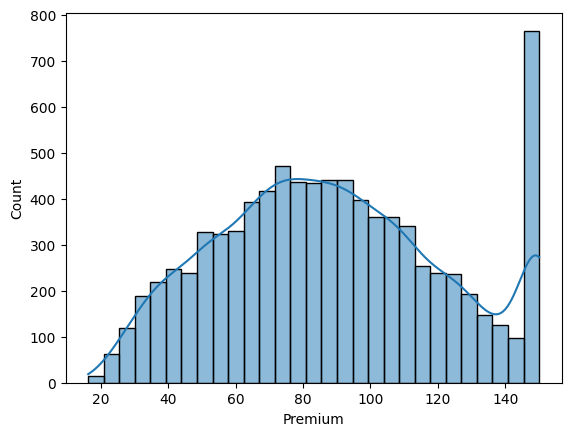

In [37]:
sns.histplot(df_modeltest['Premium'], kde='True')

Calculate price elasticity of test data

In [38]:
price_elasticity_modeltest = calculate_price_elasticity(df_modeltest,
                                                        df_asis,
                                                        conversion_col='Acc',
                                                        conversion_col_ref='Acc',
                                                        premium_col='Premium',
                                                        premium_col_ref='Premium'
                                                       )

print(f"Price_elasticity of Model test: {price_elasticity_modeltest} ")

DEBUG:root:conversion_percent: 34.31588719972148 
DEBUG:root:conversion_percent_ref: 29.18952146775109 
DEBUG:root:conversion_change: 0.17562349343870054 
DEBUG:root:avg_premium: 88.56110015086458 
DEBUG:root:avg_premium_ref: 88.136595422735 
DEBUG:root:avg_premium_change: 0.004816441185338491 
INFO:root:price_elasticity: 36.46333188357163 


Price_elasticity of Model test: 36.46333188357163 


### Price elasticity of model Q

Create dataframe of Model Q data

In [39]:
df_modelq=df.loc[df['pricingversiondescription'] == 'QUO - MODEL Q']
df_modelq

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
3,0,7,84.65,2,0.500000,4,2024-01-15,RR4Q1,70.80,118,12,RH117,4,4,7,85.92,NaN,200.0,6,1461.0,170-028-720-932,0.28,0.213559,QUO - MODEL Q,0.354000
5,0,3,0.00,0,0.000000,4,2023-09-14,QQ9R1,103.20,148,12,OX495,0,0,0,88.44,NaN,300.0,6,1079.0,351-035-125-239,0.20,-0.143023,QUO - MODEL Q,0.344000
6,0,22,1242.91,5,0.555556,4,2023-07-28,QQ9R1,110.40,261,12,SA149,3,9,8,104.28,NaN,700.0,6,1095.0,351-033-066-734,0.44,-0.055435,QUO - MODEL Q,0.157714
7,0,6,0.00,0,0.000000,12,2024-02-05,RR4Q1,86.52,30,12,RG128,0,0,1,81.12,NaN,249.0,0,2541.0,170-030-000-275,0.02,-0.062413,QUO - MODEL Q,0.347470
10,0,3,85.03,1,0.250000,11,2023-09-02,QQ9R1,63.12,135,120,CR77,1,4,3,56.64,NaN,1.0,2,365.0,351-034-741-645,0.00,-0.102662,QUO - MODEL Q,63.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,1,38,9.28,1,0.333333,4,2023-11-06,SQ9R1,114.00,175,12,SA432,0,3,6,110.88,NaN,419.0,0,2385.0,351-037-800-299,0.50,-0.027368,QUO - MODEL Q,0.272076
49992,0,60,0.00,0,0.000000,10,2024-02-07,QQ9R1,37.84,135,12,SG85,0,0,0,43.20,CAMPAIGN,400.0,0,90.0,351-042-675-627,0.27,0.141649,QUO - MODEL Q,0.094600
49994,0,49,0.00,0,0.000000,4,2024-02-05,QQ9R1,150.00,207,24,W36,0,0,0,122.28,NaN,1005.8,6,1095.0,351-042-482-719,0.15,-0.184800,QUO - MODEL Q,0.161066
49996,0,22,0.00,0,0.000000,12,2024-02-22,RR9R1,86.52,104,12,BT513,0,0,0,82.56,NaN,435.0,0,549.0,351-043-372-274,0.05,-0.045770,QUO - MODEL Q,0.198897


In [40]:
df_modelq.shape

(20235, 25)

In [41]:
df_modelq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20235 entries, 3 to 49997
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Acc                               20235 non-null  int64  
 1   ApplianceCode                     20235 non-null  int64  
 2   ClaimAmount5YearTotal             20235 non-null  float64
 3   ClaimPast5YearCount               20235 non-null  int64  
 4   ClaimsToPlansRatio                20235 non-null  float64
 5   ClientAccountDesc                 20235 non-null  int64  
 6   CurrentDate                       20235 non-null  object 
 7   DNISCode                          19184 non-null  object 
 8   Fee                               20235 non-null  float64
 9   ManufacturerBrandCode             20235 non-null  int64  
 10  ManufacturerGuaranteePartsMonths  20235 non-null  int64  
 11  OfferPostcodeSector               20235 non-null  object 
 12  PlanLiveC

In [42]:
df_modelq.isnull().sum()

Acc                                     0
ApplianceCode                           0
ClaimAmount5YearTotal                   0
ClaimPast5YearCount                     0
ClaimsToPlansRatio                      0
ClientAccountDesc                       0
CurrentDate                             0
DNISCode                             1051
Fee                                     0
ManufacturerBrandCode                   0
ManufacturerGuaranteePartsMonths        0
OfferPostcodeSector                     0
PlanLiveCount                           0
PlansAcceptedPast5YearCount             0
PlansCancelledPast5YearCount            0
Premium                                 0
PrevRTPPriceType                    17312
PurchasePrice                           0
SchemeTypeName                          0
age_appliance_days                      0
offerreferencenumber                    0
predictedconversionrate                 0
price_diff                              0
pricingversiondescription         

In [43]:
df_modelq['Acc'].value_counts()

Acc
0    13362
1     6873
Name: count, dtype: int64

In [44]:
df_modelq['Premium'].value_counts()

Premium
150.00    552
81.36     155
82.92     147
81.72     138
81.48     134
         ... 
143.04      1
29.64       1
26.28       1
29.52       1
146.40      1
Name: count, Length: 1003, dtype: int64

In [45]:
df_modelq['Premium'].describe()

count    20235.000000
mean        88.527205
std         23.159337
min         20.400000
25%         78.720000
50%         85.920000
75%         98.280000
max        150.000000
Name: Premium, dtype: float64

<Axes: xlabel='Premium', ylabel='Count'>

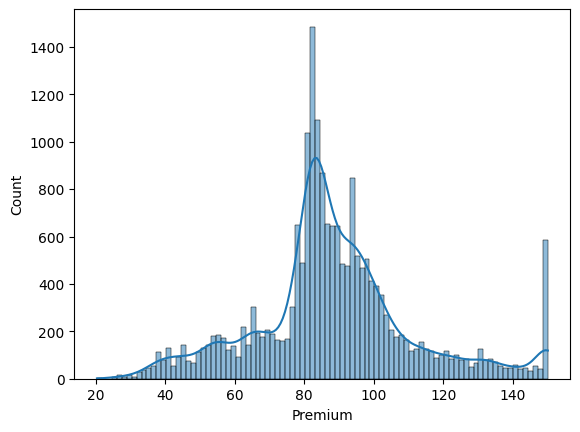

In [46]:
sns.histplot(df_modelq['Premium'], kde='True')


Calculate price elasticty of Model Q

In [47]:
price_elasticity_modelq = calculate_price_elasticity(df_modelq,
                                                        df_asis,
                                                        conversion_col='Acc',
                                                        conversion_col_ref='Acc',
                                                        premium_col='Premium',
                                                        premium_col_ref='Premium'
                                                       )

print(f"Price_elasticity of Model Q: {price_elasticity_modelq} ")

DEBUG:root:conversion_percent: 33.96590066716086 
DEBUG:root:conversion_percent_ref: 29.18952146775109 
DEBUG:root:conversion_change: 0.16363335057365597 
DEBUG:root:avg_premium: 88.52720533728689 
DEBUG:root:avg_premium_ref: 88.136595422735 
DEBUG:root:avg_premium_change: 0.0044318697889155064 
INFO:root:price_elasticity: 36.921967108085454 


Price_elasticity of Model Q: 36.921967108085454 


In [48]:
df_modelq['SchemeTypeName'].value_counts()

SchemeTypeName
0    11913
6     5663
3      826
5      739
2      608
1      282
4      204
Name: count, dtype: int64

In [49]:
df_modelq['SchemeTypeName'].value_counts()

SchemeTypeName
0    11913
6     5663
3      826
5      739
2      608
1      282
4      204
Name: count, dtype: int64

Calculate accuracy, precition, recall and F1-score of Model Q

In [50]:
df_modelq['predicted_label'] = df_modelq['predictedconversionrate'].apply(lambda x: 1 if x >= 0.5 else 0)


accuracy = accuracy_score(df_modelq['Acc'].values, df_modelq['predicted_label'].values)
accuracy
print("accuracy:", accuracy)

# Calculate precision
precision = precision_score(df_modelq['Acc'].values, df_modelq['predicted_label'].values)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(df_modelq['Acc'].values, df_modelq['predicted_label'].values)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(df_modelq['Acc'].values, df_modelq['predicted_label'].values)
print("F1-Score:", f1)

accuracy: 0.6777860143316037
Precision: 0.5445369669442341
Recall (Sensitivity): 0.31398224938163827
F1-Score: 0.3983019564414913


### Price elasticity within Model Q group

Create segments within Model Q data using 'SchemeTypeName' 0 and 'SchemeTypeName' 1

In [51]:
df_modelq_scheme0 = df_modelq[df_modelq['SchemeTypeName'] == 0]
df_modelq_scheme1 = df_modelq[df_modelq['SchemeTypeName'] == 1]

df_modelq_scheme0

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee,predicted_label
7,0,6,0.00,0,0.000000,12,2024-02-05,RR4Q1,86.52,30,12,RG128,0,0,1,81.12,NaN,249.0,0,2541.0,170-030-000-275,0.02,-0.062413,QUO - MODEL Q,0.347470,0
18,0,3,0.00,0,0.000000,12,2023-11-28,RR4Q1,99.84,135,120,LL571,0,0,0,82.68,NaN,349.0,0,844.0,170-026-504-628,0.04,-0.171875,QUO - MODEL Q,0.286074,0
19,1,7,519.20,6,1.000000,12,2023-05-19,RR4Q1,30.00,272,12,KY76,2,6,6,35.16,NaN,200.0,0,21.0,170-019-933-102,0.47,0.172000,QUO - MODEL Q,0.150000,0
20,0,38,2823.38,24,0.800000,4,2023-04-06,NaN,90.00,302,12,SE63,2,30,35,97.68,CAMPAIGN,269.0,0,1779.0,170-018-893-026,0.44,0.085333,QUO - MODEL Q,0.334572,0
21,0,16,1359.73,5,1.250000,12,2023-10-11,CQ9R1,99.84,135,120,GU220,2,4,3,87.72,NaN,400.0,0,770.0,351-036-567-743,0.18,-0.121394,QUO - MODEL Q,0.249600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,1,38,0.00,0,0.000000,4,2023-11-04,CQ0Y1,131.88,261,12,SA128,1,2,1,111.24,NaN,1000.0,0,365.0,034-025-030-565,0.49,-0.156506,QUO - MODEL Q,0.131880,0
49986,1,2,695.00,4,0.666667,4,2023-12-11,OQ4Q1,85.20,293,12,CV33,0,6,6,85.44,NaN,200.0,0,897.0,170-027-340-738,0.16,0.002817,QUO - MODEL Q,0.426000,0
49989,1,38,9.28,1,0.333333,4,2023-11-06,SQ9R1,114.00,175,12,SA432,0,3,6,110.88,NaN,419.0,0,2385.0,351-037-800-299,0.50,-0.027368,QUO - MODEL Q,0.272076,1
49992,0,60,0.00,0,0.000000,10,2024-02-07,QQ9R1,37.84,135,12,SG85,0,0,0,43.20,CAMPAIGN,400.0,0,90.0,351-042-675-627,0.27,0.141649,QUO - MODEL Q,0.094600,0


Calculate price elasticty within Model Q group using 'SchemeTypeName' 0 and 'SchemeTypeName' 1 segments

In [52]:
price_elasticity_modelq_scheme0_vs_scheme1 = calculate_price_elasticity(df_modelq_scheme0,
                                                        df_modelq_scheme1,
                                                        conversion_col='Acc',
                                                        conversion_col_ref='Acc',
                                                        premium_col='Premium',
                                                        premium_col_ref='Premium'
                                                       )

logging.info(f"Price_elasticity of Model Q scheme0 vs scheme1 : {price_elasticity_modelq_scheme0_vs_scheme1} ")

DEBUG:root:conversion_percent: 39.10014270125073 
DEBUG:root:conversion_percent_ref: 64.18439716312056 
DEBUG:root:conversion_change: -0.3908154562567565 
DEBUG:root:avg_premium: 86.36968018131454 
DEBUG:root:avg_premium_ref: 89.45106382978723 
DEBUG:root:avg_premium_change: -0.03444770264930704 
INFO:root:price_elasticity: 11.34518200634254 
INFO:root:Price_elasticity of Model Q scheme0 vs scheme1 : 11.34518200634254 


### Build new model on test data

Create dataframe using test data

In [53]:
df_newmodel = df_modeltest.copy()
df_newmodel = df_newmodel.reset_index(drop=True)
df_newmodel


,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee
0,0,38,0.00,0,0.000000,4,2024-02-05,CQ9R1,114.00,233,12,BD229,2,2,0,94.44,NaN,379.0,0,887.0,351-042-506-307,NaN,-0.171579,QUO - PRICE TEST,0.300792
1,1,67,105.48,2,0.250000,4,2023-09-20,RR3A1,150.00,135,120,RM26,3,8,7,136.32,NaN,550.0,0,1826.0,118-000-079-955,NaN,-0.091200,QUO - PRICE TEST,0.294545
2,0,38,0.00,0,0.000000,4,2023-07-29,SQ9R1,114.00,128,12,WV147,1,6,5,117.72,CAMPAIGN,500.0,0,1399.0,351-033-085-284,NaN,0.032632,QUO - PRICE TEST,0.228000
3,1,38,0.00,0,0.000000,4,2023-10-27,CQ9R1,86.28,261,12,CR00,0,0,0,66.36,NaN,529.0,0,122.0,351-037-427-051,NaN,-0.230876,QUO - PRICE TEST,0.163100
4,1,3,9.28,1,0.000000,4,2023-02-06,RR1K1,103.20,46,12,ME22,1,0,2,97.80,NaN,250.0,5,1280.0,056-000-879-992,NaN,-0.052326,QUO - PRICE TEST,0.412800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,0,67,0.00,0,0.000000,4,2023-01-04,QQ9R1,150.00,4,12,CB227,0,0,1,150.00,NaN,599.0,5,1826.0,351-023-566-679,NaN,0.000000,QUO - PRICE TEST,0.270451
8613,1,41,0.00,0,0.000000,12,2023-01-04,OQ4Q1,26.64,201,24,B120,0,1,2,25.44,NaN,120.0,0,15.0,170-016-464-879,NaN,-0.045045,QUO - PRICE TEST,0.222000
8614,0,3,0.00,0,0.000000,4,2023-05-02,SQ9R1,123.60,39,24,LA59,1,1,0,150.00,NaN,350.0,6,2191.0,351-029-011-677,NaN,0.213592,QUO - PRICE TEST,0.353143
8615,0,7,194.00,2,0.333333,4,2023-04-28,RR191,70.80,314,12,BS57,5,6,4,51.00,NaN,150.0,0,1095.0,045-000-420-392,NaN,-0.279661,QUO - PRICE TEST,0.472000


### Categorical features

Function to encode categorical features using one hot encoding

In [54]:
def encode_categorical_values(df, columns_to_encode):

    for col in columns_to_encode:
        # Convert categorical column to one-hot encoded representation
        encoded_cols = pd.get_dummies(df[col], prefix=col)
        # Concatenate one-hot encoded columns
        df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    df.replace({False: 0, True: 1}, inplace=True)

    return df

Function to process rare values and assign them to same category

In [55]:
def process_rare_values(df, variable, threshold, replace_value):
    freqs = df[variable].value_counts(normalize=True)
    frequent_cat = [x for x in freqs.loc[freqs > threshold].index.values]
    [x for x in df[variable].unique() if x not in frequent_cat]
    df[variable] = np.where(df[variable].isin(
    frequent_cat), df[variable], replace_value)

In [56]:
df_newmodel["ApplianceCode"].value_counts()

ApplianceCode
3     1506
38    1156
22     930
60     582
16     518
6      500
49     467
7      367
31     355
9      250
28     249
26     240
35     229
67     217
41     209
23     208
5      120
15     114
53      80
17      65
61      58
2       46
34      43
48      31
66      15
45      13
11       4
14       4
44       4
37       3
4        3
57       3
39       3
69       2
58       2
1        2
8        2
24       2
52       2
33       2
18       1
47       1
25       1
46       1
12       1
56       1
40       1
42       1
59       1
21       1
54       1
Name: count, dtype: int64

Mark 1 percent of ApplianceCode as rare values and assign them to group 100

In [57]:
process_rare_values(df_newmodel, 'ApplianceCode', 0.01, 100)

In [58]:
df_newmodel["ApplianceCode"].value_counts()

ApplianceCode
3      1506
38     1156
22      930
60      582
16      518
6       500
49      467
100     400
7       367
31      355
9       250
28      249
26      240
35      229
67      217
41      209
23      208
5       120
15      114
Name: count, dtype: int64

Function to get post code area from post code

In [59]:
def get_postcode_area(x):
    s = x[:2]
    result = ''.join([i for i in s if not i.isdigit()])
    return result
df_newmodel['postcode_area'] = df_newmodel['OfferPostcodeSector'].apply(get_postcode_area)
df_newmodel.head(100)


,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee,postcode_area
0,0,38,0.00,0,0.000000,4,2024-02-05,CQ9R1,114.00,233,12,BD229,2,2,0,94.44,NaN,379.0,0,887.0,351-042-506-307,NaN,-0.171579,QUO - PRICE TEST,0.300792,BD
1,1,67,105.48,2,0.250000,4,2023-09-20,RR3A1,150.00,135,120,RM26,3,8,7,136.32,NaN,550.0,0,1826.0,118-000-079-955,NaN,-0.091200,QUO - PRICE TEST,0.294545,RM
2,0,38,0.00,0,0.000000,4,2023-07-29,SQ9R1,114.00,128,12,WV147,1,6,5,117.72,CAMPAIGN,500.0,0,1399.0,351-033-085-284,NaN,0.032632,QUO - PRICE TEST,0.228000,WV
3,1,38,0.00,0,0.000000,4,2023-10-27,CQ9R1,86.28,261,12,CR00,0,0,0,66.36,NaN,529.0,0,122.0,351-037-427-051,NaN,-0.230876,QUO - PRICE TEST,0.163100,CR
4,1,3,9.28,1,0.000000,4,2023-02-06,RR1K1,103.20,46,12,ME22,1,0,2,97.80,NaN,250.0,5,1280.0,056-000-879-992,NaN,-0.052326,QUO - PRICE TEST,0.412800,ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,0.00,0,0.000000,12,2023-10-18,RR4Q1,99.84,148,12,N136,0,0,0,88.20,NaN,300.0,0,1461.0,170-024-905-457,NaN,-0.116587,QUO - PRICE TEST,0.332800,N
96,0,6,1395.64,16,1.777778,4,2023-01-13,QQ9R1,76.80,87,12,E78,4,9,10,79.80,NaN,300.0,6,2922.0,351-023-907-683,NaN,0.039062,QUO - PRICE TEST,0.256000,E
97,0,7,0.00,0,0.000000,17,2023-06-06,NaN,32.28,314,12,GL193,0,0,0,30.24,NaN,129.0,2,1.0,170-020-285-016,NaN,-0.063197,QUO - PRICE TEST,0.250233,GL
98,0,3,363.84,3,0.000000,4,2023-09-21,RR2M1,103.20,327,12,NW88,0,0,1,133.20,NaN,200.0,6,1461.0,094-003-691-357,NaN,0.290698,QUO - PRICE TEST,0.516000,NW


In [60]:
df_newmodel["OfferPostcodeSector"].value_counts()

OfferPostcodeSector
E125     15
B95      12
CR06     11
BL18     11
B203     10
         ..
HU91      1
HD97      1
PL35      1
ME196     1
B120      1
Name: count, Length: 4658, dtype: int64

In [61]:
df_newmodel['postcode_area'].value_counts()

postcode_area
B     403
SE    242
E     217
M     202
N     185
     ... 
GY      2
P       1
JE      1
V       1
ZE      1
Name: count, Length: 126, dtype: int64

Mark 1 percent of rare post code values and rare and assign them to 'rare' group

In [62]:
process_rare_values(df_newmodel, 'postcode_area', 0.001, 'rare')

In [63]:
df_newmodel['postcode_area'].value_counts()

postcode_area
B     403
SE    242
E     217
M     202
N     185
     ... 
HR     15
IV     14
PH     12
TD     10
EC      9
Name: count, Length: 115, dtype: int64

In [64]:
df_newmodel['CurrentDate'].value_counts()

CurrentDate
2023-01-23    59
2023-01-16    55
2023-02-20    54
2023-01-24    48
2023-01-04    47
              ..
2024-01-28     2
2024-01-23     1
2023-11-29     1
2024-01-07     1
2023-12-31     1
Name: count, Length: 398, dtype: int64

In [65]:
df_newmodel["CurrentDate"] = pd.to_datetime(df_newmodel["CurrentDate"])
df_newmodel["year"] = df_newmodel["CurrentDate"].dt.year
df_newmodel["month"] = df_newmodel["CurrentDate"].dt.month
df_newmodel.head()

,Acc,ApplianceCode,ClaimAmount5YearTotal,ClaimPast5YearCount,ClaimsToPlansRatio,ClientAccountDesc,CurrentDate,DNISCode,Fee,ManufacturerBrandCode,ManufacturerGuaranteePartsMonths,OfferPostcodeSector,PlanLiveCount,PlansAcceptedPast5YearCount,PlansCancelledPast5YearCount,Premium,PrevRTPPriceType,PurchasePrice,SchemeTypeName,age_appliance_days,offerreferencenumber,predictedconversionrate,price_diff,pricingversiondescription,relFee,postcode_area,year,month
0,0,38,0.00,0,0.00,4,2024-02-05,CQ9R1,114.00,233,12,BD229,2,2,0,94.44,NaN,379.0,0,887.0,351-042-506-307,NaN,-0.171579,QUO - PRICE TEST,0.300792,BD,2024,2
1,1,67,105.48,2,0.25,4,2023-09-20,RR3A1,150.00,135,120,RM26,3,8,7,136.32,NaN,550.0,0,1826.0,118-000-079-955,NaN,-0.091200,QUO - PRICE TEST,0.294545,RM,2023,9
2,0,38,0.00,0,0.00,4,2023-07-29,SQ9R1,114.00,128,12,WV147,1,6,5,117.72,CAMPAIGN,500.0,0,1399.0,351-033-085-284,NaN,0.032632,QUO - PRICE TEST,0.228000,WV,2023,7
3,1,38,0.00,0,0.00,4,2023-10-27,CQ9R1,86.28,261,12,CR00,0,0,0,66.36,NaN,529.0,0,122.0,351-037-427-051,NaN,-0.230876,QUO - PRICE TEST,0.163100,CR,2023,10
4,1,3,9.28,1,0.00,4,2023-02-06,RR1K1,103.20,46,12,ME22,1,0,2,97.80,NaN,250.0,5,1280.0,056-000-879-992,NaN,-0.052326,QUO - PRICE TEST,0.412800,ME,2023,2


Encode categrical columns using one hot encoding

In [66]:
columns_to_encode = ['postcode_area','ApplianceCode', 'ClientAccountDesc', 'SchemeTypeName', 'ManufacturerGuaranteePartsMonths']
df_newmodel_encoded = df_newmodel[columns_to_encode]
df_newmodel_encoded = encode_categorical_values(df_newmodel_encoded, columns_to_encode)
df_newmodel_encoded

,postcode_area_AB,postcode_area_AL,postcode_area_B,postcode_area_BA,postcode_area_BB,postcode_area_BD,postcode_area_BH,postcode_area_BL,postcode_area_BN,postcode_area_BR,postcode_area_BS,postcode_area_BT,postcode_area_CA,postcode_area_CB,postcode_area_CF,postcode_area_CH,postcode_area_CM,postcode_area_CO,postcode_area_CR,postcode_area_CT,postcode_area_CV,postcode_area_CW,postcode_area_DA,postcode_area_DD,postcode_area_DE,postcode_area_DH,postcode_area_DL,postcode_area_DN,postcode_area_DT,postcode_area_DY,postcode_area_E,postcode_area_EC,postcode_area_EH,postcode_area_EN,postcode_area_EX,postcode_area_FK,postcode_area_FY,postcode_area_G,postcode_area_GL,postcode_area_GU,postcode_area_HA,postcode_area_HD,postcode_area_HP,postcode_area_HR,postcode_area_HU,postcode_area_HX,postcode_area_IG,postcode_area_IP,postcode_area_IV,postcode_area_KA,postcode_area_KT,postcode_area_KY,postcode_area_L,postcode_area_LA,postcode_area_LE,postcode_area_LL,postcode_area_LN,postcode_area_LS,postcode_area_LU,postcode_area_M,postcode_area_ME,postcode_area_MK,postcode_area_ML,postcode_area_N,postcode_area_NE,postcode_area_NG,postcode_area_NN,postcode_area_NP,postcode_area_NR,postcode_area_NW,postcode_area_OL,postcode_area_OX,postcode_area_PA,postcode_area_PE,postcode_area_PH,postcode_area_PL,postcode_area_PO,postcode_area_PR,postcode_area_RG,postcode_area_RH,postcode_area_RM,postcode_area_S,postcode_area_SA,postcode_area_SE,postcode_area_SG,postcode_area_SK,postcode_area_SL,postcode_area_SM,postcode_area_SN,postcode_area_SO,postcode_area_SP,postcode_area_SR,postcode_area_SS,postcode_area_ST,postcode_area_SW,postcode_area_SY,postcode_area_TA,postcode_area_TD,postcode_area_TF,postcode_area_TN,postcode_area_TQ,postcode_area_TR,postcode_area_TS,postcode_area_TW,postcode_area_UB,postcode_area_W,postcode_area_WA,postcode_area_WD,postcode_area_WF,postcode_area_WN,postcode_area_WR,postcode_area_WS,postcode_area_WV,postcode_area_YO,postcode_area_rare,ApplianceCode_3,ApplianceCode_5,ApplianceCode_6,ApplianceCode_7,ApplianceCode_9,ApplianceCode_15,ApplianceCode_16,ApplianceCode_22,ApplianceCode_23,ApplianceCode_26,ApplianceCode_28,ApplianceCode_31,ApplianceCode_35,ApplianceCode_38,ApplianceCode_41,ApplianceCode_49,ApplianceCode_60,ApplianceCode_67,ApplianceCode_100,ClientAccountDesc_0,ClientAccountDesc_1,ClientAccountDesc_2,ClientAccountDesc_3,ClientAccountDesc_4,ClientAccountDesc_5,ClientAccountDesc_6,ClientAccountDesc_8,ClientAccountDesc_9,ClientAccountDesc_10,ClientAccountDesc_11,ClientAccountDesc_12,ClientAccountDesc_14,ClientAccountDesc_15,ClientAccountDesc_16,ClientAccountDesc_17,ClientAccountDesc_19,ClientAccountDesc_20,SchemeTypeName_0,SchemeTypeName_1,SchemeTypeName_2,SchemeTypeName_3,SchemeTypeName_4,SchemeTypeName_5,SchemeTypeName_6,ManufacturerGuaranteePartsMonths_12,ManufacturerGuaranteePartsMonths_24,ManufacturerGuaranteePartsMonths_36,ManufacturerGuaranteePartsMonths_60,ManufacturerGuaranteePartsMonths_120
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Numerical features

In [67]:
# feature to ignore 'ClaimPast5YearCount' PlanLiveCount 'PlansAcceptedPast5YearCount',

features_numerical = ['ClaimAmount5YearTotal',
                      'ClaimsToPlansRatio',
                      'PlansCancelledPast5YearCount',
                      'Fee',
                      'Premium',
                      'PurchasePrice',
                      'age_appliance_days',
                      'price_diff',
                      'relFee'
                     ]

df_newmodel_numerical = df_newmodel[features_numerical]
df_newmodel_numerical

,ClaimAmount5YearTotal,ClaimsToPlansRatio,PlansCancelledPast5YearCount,Fee,Premium,PurchasePrice,age_appliance_days,price_diff,relFee
0,0.00,0.000000,0,114.00,94.44,379.0,887.0,-0.171579,0.300792
1,105.48,0.250000,7,150.00,136.32,550.0,1826.0,-0.091200,0.294545
2,0.00,0.000000,5,114.00,117.72,500.0,1399.0,0.032632,0.228000
3,0.00,0.000000,0,86.28,66.36,529.0,122.0,-0.230876,0.163100
4,9.28,0.000000,2,103.20,97.80,250.0,1280.0,-0.052326,0.412800
...,...,...,...,...,...,...,...,...,...
8612,0.00,0.000000,1,150.00,150.00,599.0,1826.0,0.000000,0.270451
8613,0.00,0.000000,2,26.64,25.44,120.0,15.0,-0.045045,0.222000
8614,0.00,0.000000,0,123.60,150.00,350.0,2191.0,0.213592,0.353143
8615,194.00,0.333333,4,70.80,51.00,150.0,1095.0,-0.279661,0.472000


Create histogram and QQ plots of ClaimAmount5YearTotal. Also perform Yeo Jonhson transform to reduce skewness of data

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Muneeb\\anaconda3\\envs\\nlp\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 

6.332083894424293


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelawUI.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICBI.TTF', name='Century Gothic', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\monbaiti.ttf', name='Mongolian Baiti', style='normal', variant='normal', weight=40

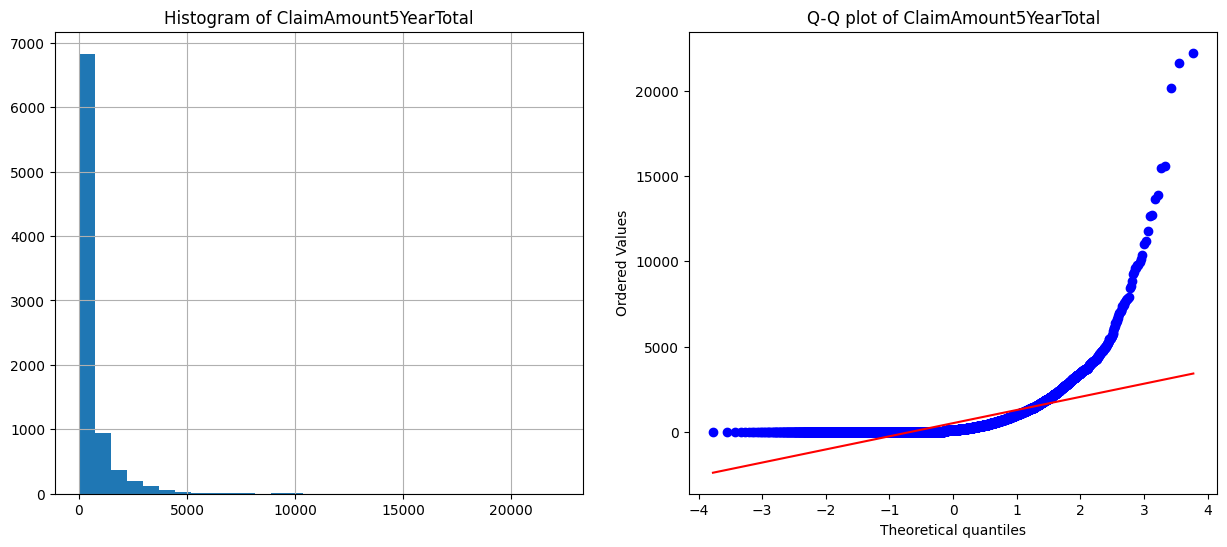

-0.016869322408744298


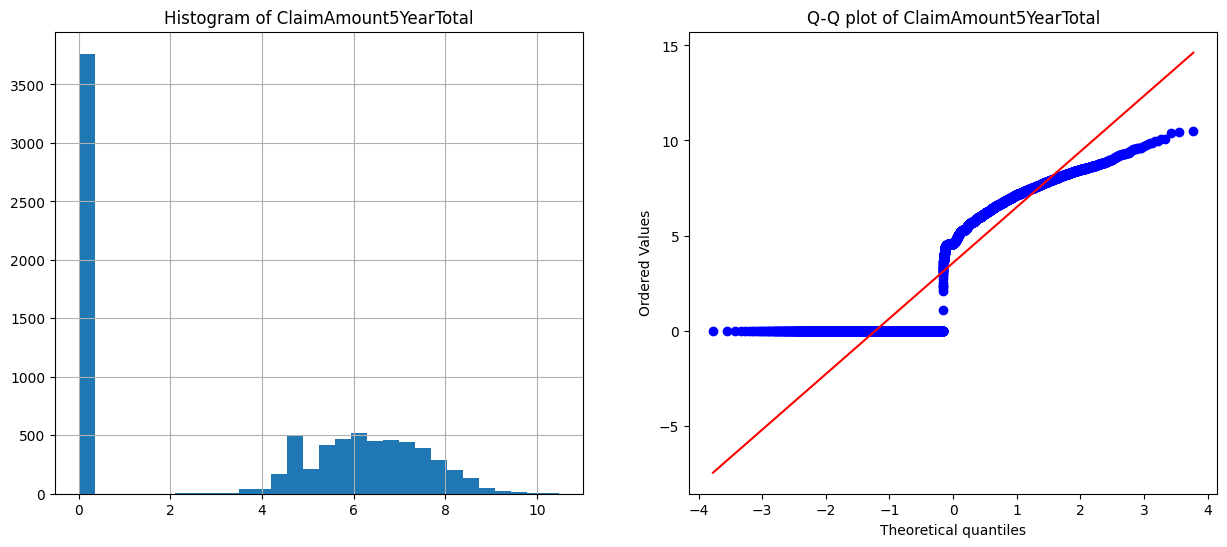

In [68]:
diagnostic_plots(df_newmodel_numerical, "ClaimAmount5YearTotal")
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_newmodel_numerical["ClaimAmount5YearTotal"] = pt.fit_transform(df_newmodel_numerical["ClaimAmount5YearTotal"].values.reshape(-1, 1))
diagnostic_plots(df_newmodel_numerical, "ClaimAmount5YearTotal")

Create histogram and QQ plots of ClaminsToPlansRatio. Also perform Yeo Jonhson transform to reduce skewness of data

3.018507685056034


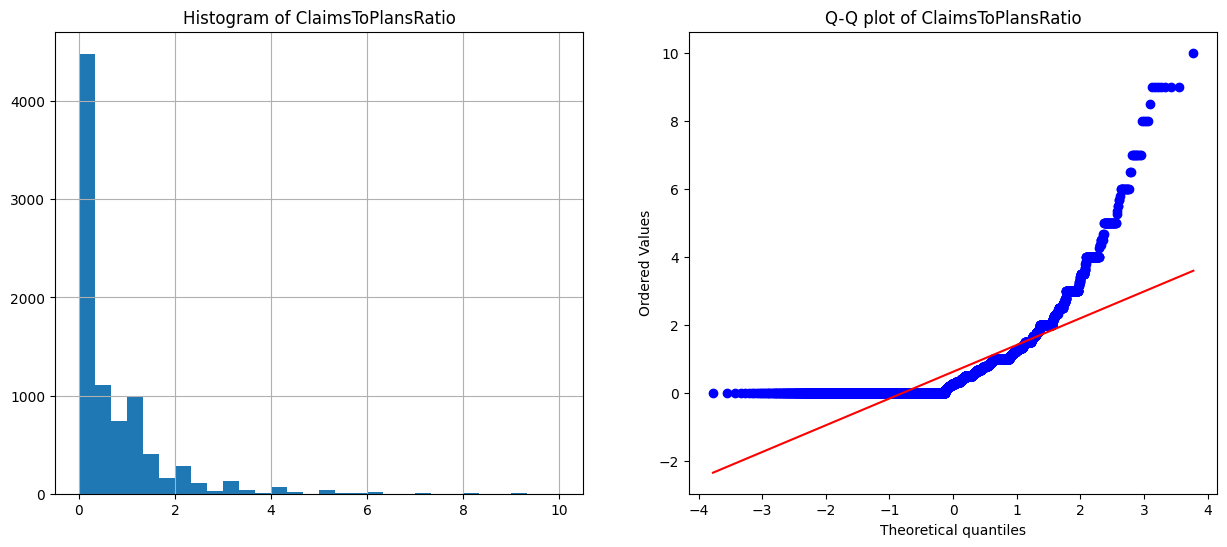

0.32588740542156286


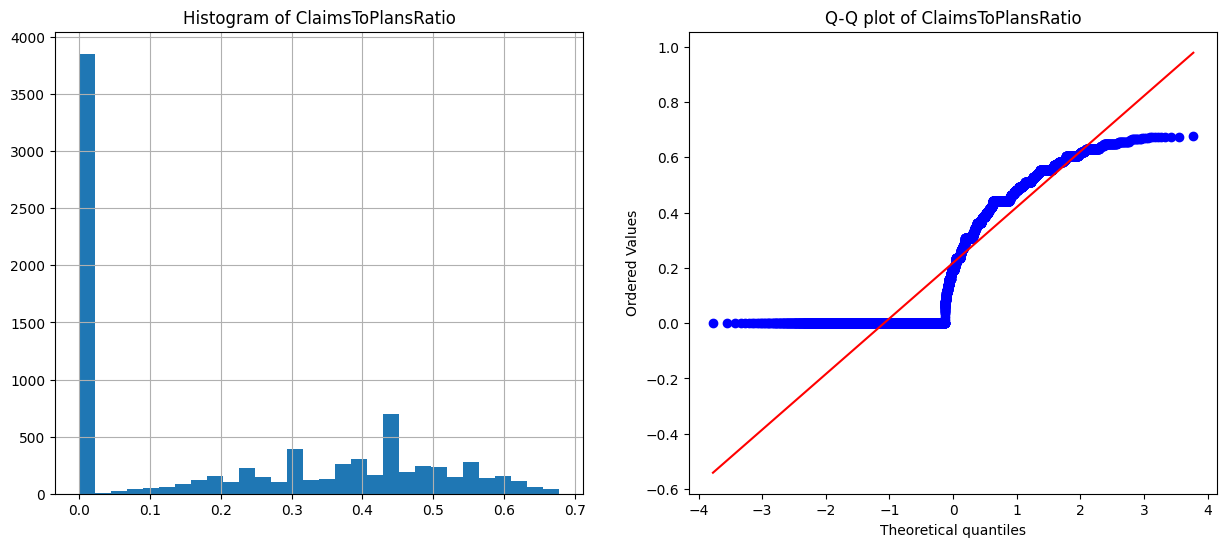

In [69]:
diagnostic_plots(df_newmodel_numerical, "ClaimsToPlansRatio")
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_newmodel_numerical["ClaimsToPlansRatio"] = pt.fit_transform(df_newmodel_numerical["ClaimsToPlansRatio"].values.reshape(-1, 1))
diagnostic_plots(df_newmodel_numerical, "ClaimsToPlansRatio")

Create histogram and QQ plots of PlansCancelledPast5YearCount. Also perform Yeo Jonhson transform to reduce skewness of data

7.263614280958324


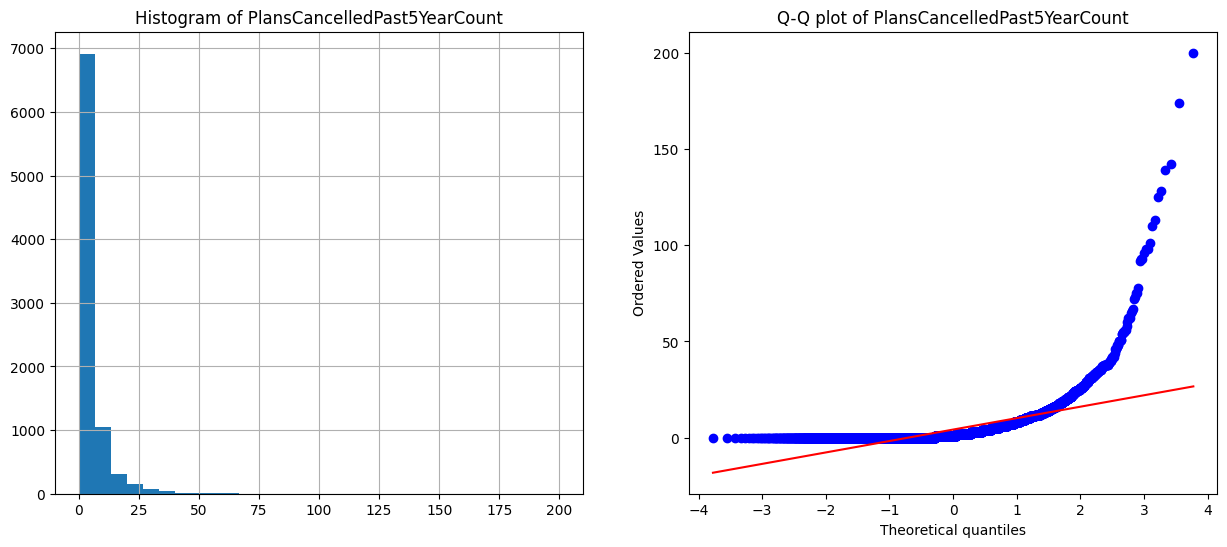

0.18933086862559437


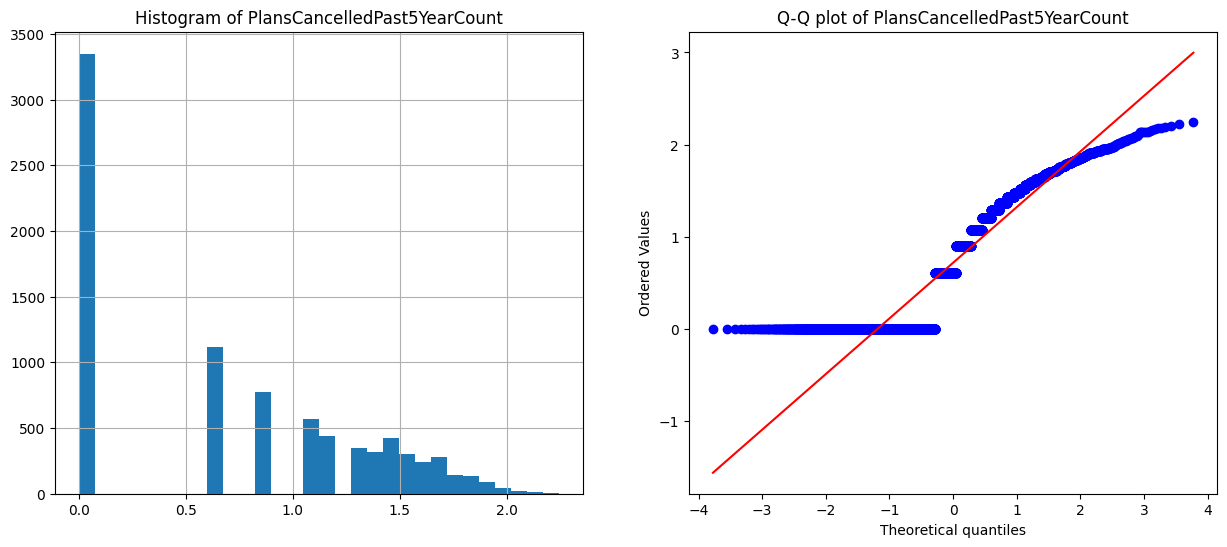

In [70]:
diagnostic_plots(df_newmodel_numerical, "PlansCancelledPast5YearCount")
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_newmodel_numerical["PlansCancelledPast5YearCount"] = pt.fit_transform(df_newmodel_numerical["PlansCancelledPast5YearCount"].values.reshape(-1, 1))
diagnostic_plots(df_newmodel_numerical, "PlansCancelledPast5YearCount")



Change scale of the Fee data using robust scaler.

0.12122681085406008


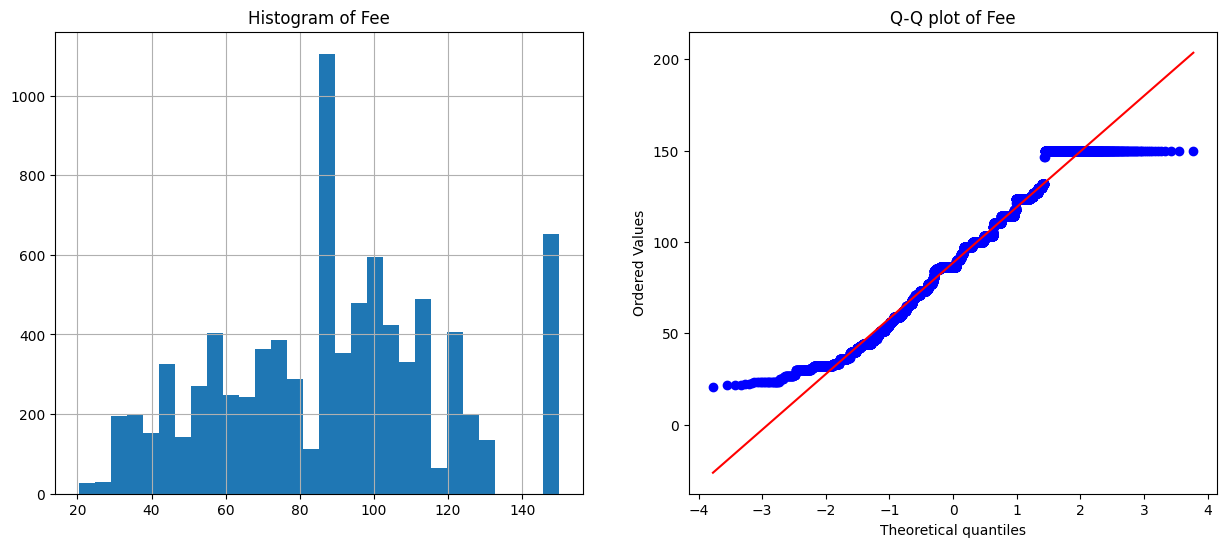

0.12122681085406


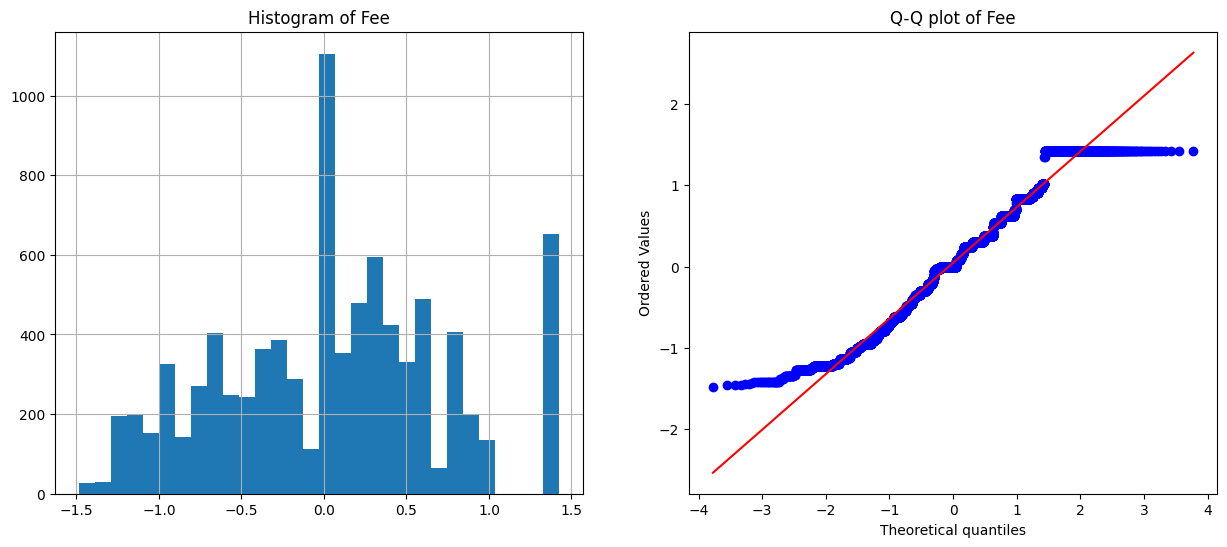

In [71]:
diagnostic_plots(df_newmodel_numerical, "Fee")
rscaler = RobustScaler()
df_newmodel_numerical["Fee"] = rscaler.fit_transform(df_newmodel_numerical["Fee"].values.reshape(-1,1))
diagnostic_plots(df_newmodel_numerical, "Fee")

0.18765169222630557


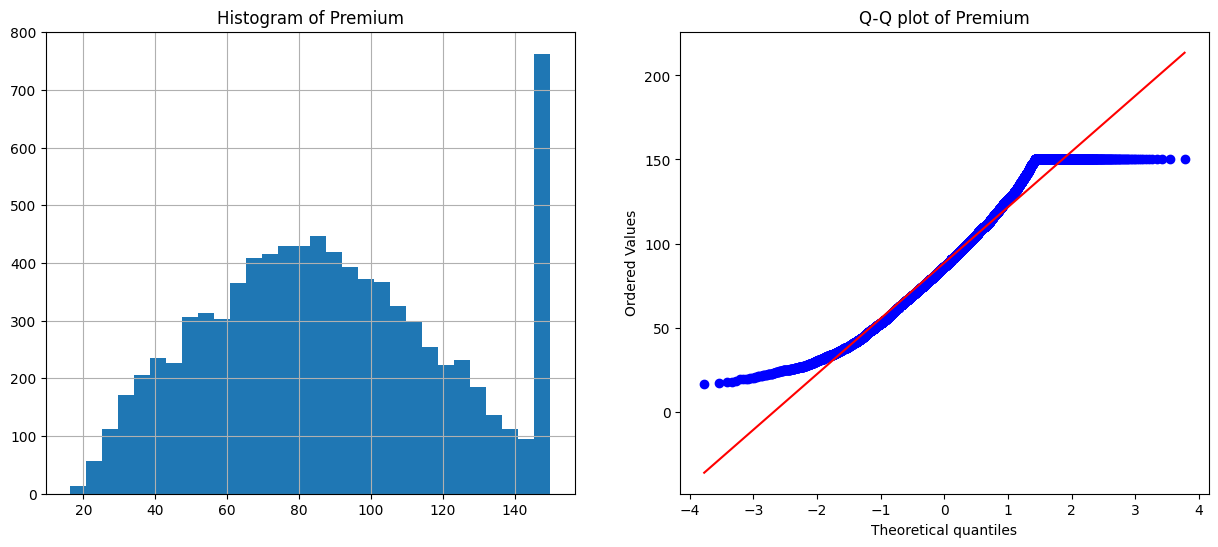

In [72]:
diagnostic_plots(df_newmodel_numerical, "Premium")

1.5898579713748129


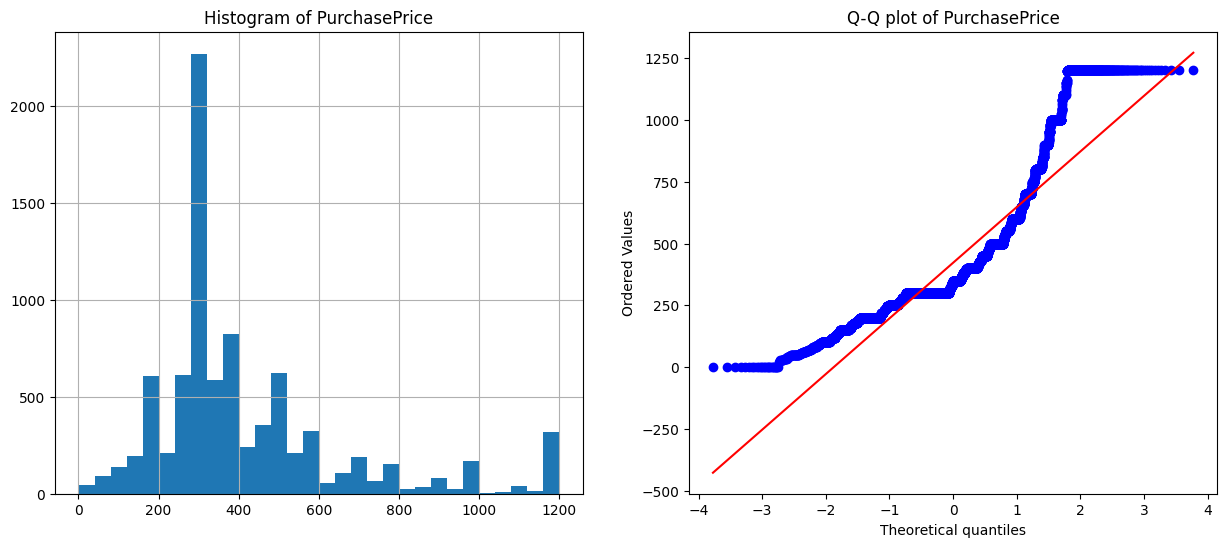

In [73]:
diagnostic_plots(df_newmodel_numerical, "PurchasePrice")


0.454297604833405


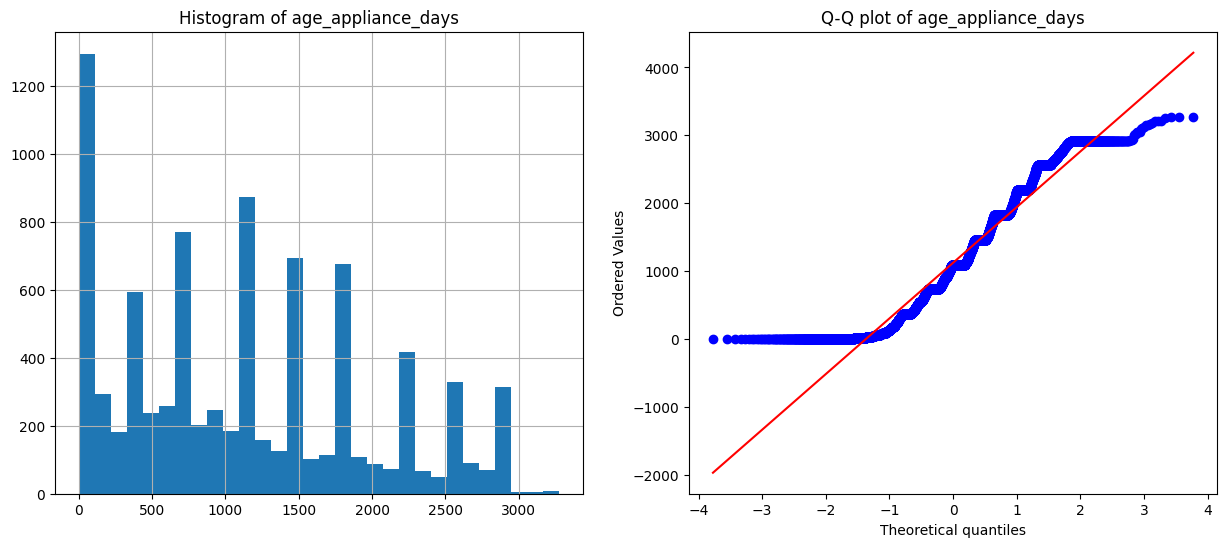

In [74]:
diagnostic_plots(df_newmodel_numerical, "age_appliance_days")

0.02320310180553929


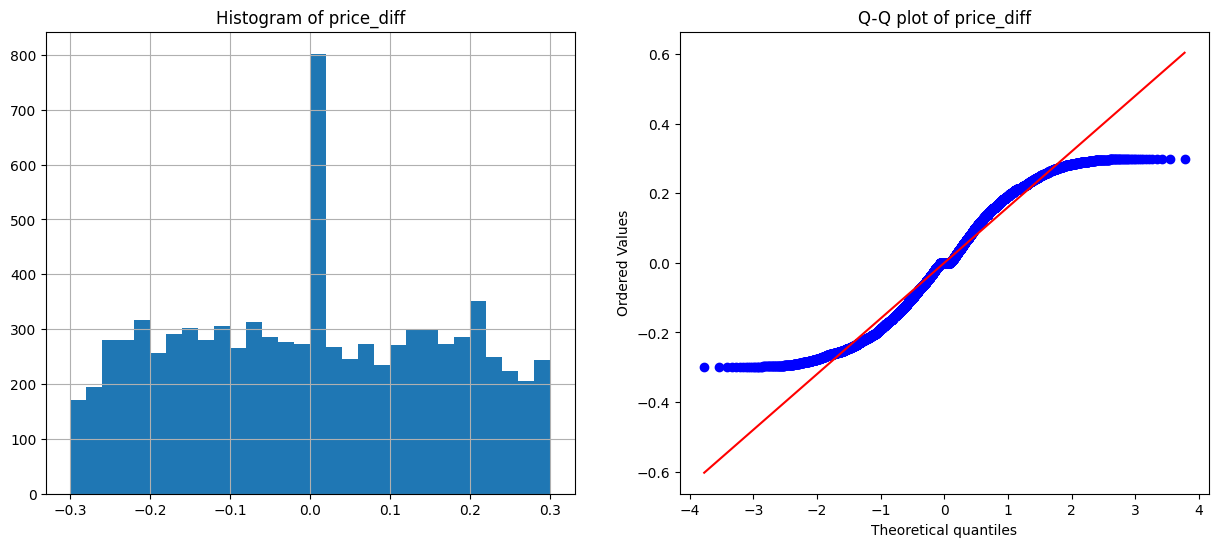

In [75]:
diagnostic_plots(df_newmodel_numerical, "price_diff")

Reduce skewness of relFee data using reciprocal transform

19.562504941079446


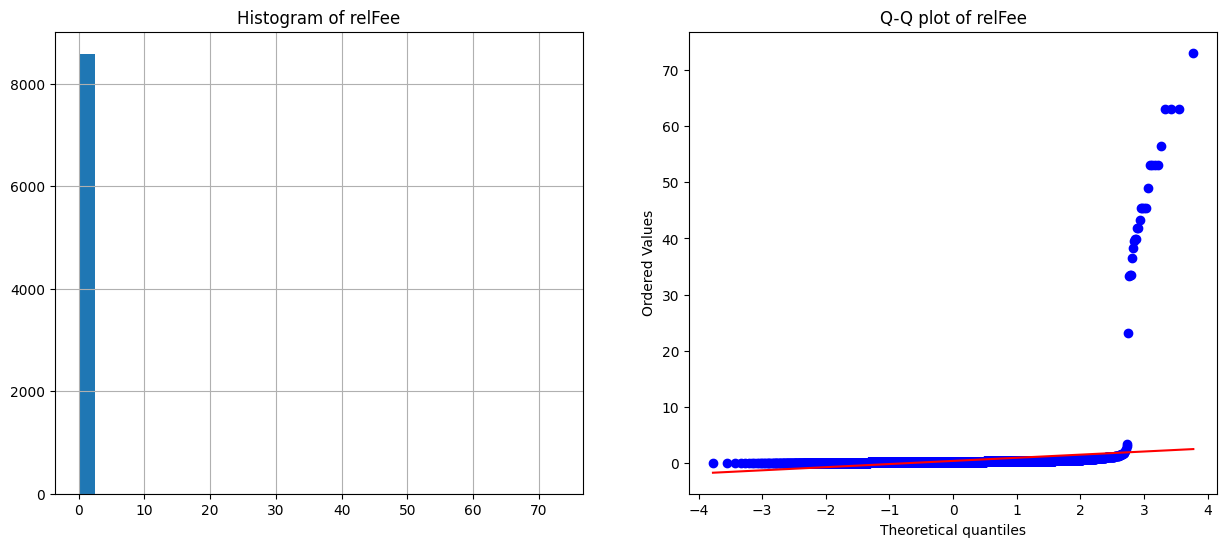

2.775715875864684


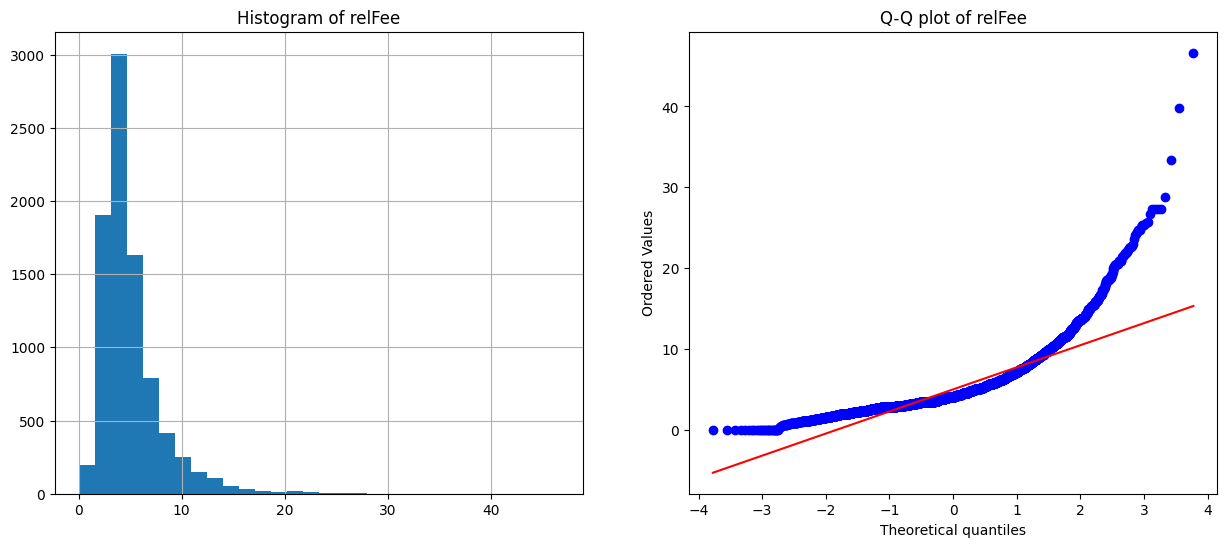

In [76]:
diagnostic_plots(df_newmodel_numerical, "relFee")
df_newmodel_numerical['relFee'] = np.reciprocal(df_newmodel_numerical['relFee'])
diagnostic_plots(df_newmodel_numerical, "relFee")

In [77]:
df_newmodel_numerical["relFee"].describe() 

count    8617.000000
mean        5.036321
std         3.091528
min         0.013684
25%         3.170290
50%         4.098361
75%         5.910648
max        46.642857
Name: relFee, dtype: float64

### Combine features and targets

Combine encoded categorical features, transformed and scaled numerical features and target into one dataframe

In [78]:
df_newmodel_combined = pd.concat([df_newmodel_encoded, df_newmodel_numerical], axis=1)

df_newmodel_combined['Acc'] = df_newmodel['Acc']

### Create train test split

Create train test split of data. The split is stratified so that both test and train contain same ratio of 'Acc' class values

In [79]:
X = df_newmodel_combined.drop(columns=["Acc"])
y = df_newmodel_combined["Acc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

The training data contain different number of values of 1 and 0 for 'Acc'. Use SMOTE strategy to create synthetic samples of minority class in order to have same number of 1s and 0s for 'Acc' in the training data 

In [80]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 4528
Before upsampling count of label 1 2365


  File "c:\Users\Muneeb\anaconda3\envs\nlp\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Muneeb\anaconda3\envs\nlp\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Muneeb\anaconda3\envs\nlp\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Muneeb\anaconda3\envs\nlp\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


After upsampling count of label 0 4528
After upsampling count of label 1 4528


### Build models

Build different models and evaluate their performance using cross validation. Report the result of evaluation using metrics such as Accuracy, Precision, Recall and F1-score

In [81]:
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    
    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),
    
    #Nearest Neighbour
    KNeighborsClassifier(),
    
    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5, 
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    print(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

AdaBoostClassifier
BaggingClassifier
LogisticRegressionCV
RidgeClassifierCV
KNeighborsClassifier
XGBClassifier


,model_name,test_accuracy,test_precision,test_recall,test_f1
5,XGBClassifier,73.900000,63.000000,58.000000,60.300000
3,RidgeClassifierCV,73.300000,63.600000,52.100000,57.200000
2,LogisticRegressionCV,73.200000,63.900000,51.100000,56.700000
0,AdaBoostClassifier,72.800000,63.300000,49.400000,55.400000
1,BaggingClassifier,72.700000,62.400000,51.600000,56.500000
4,KNeighborsClassifier,66.100000,50.800000,38.500000,43.800000


From the evauation table the best performing model is the XGBClassifier. This is selected as the final model.

In [82]:
final_model=XGBClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.6977958236658933

Create confusion matrix of the final model

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001D0DF94F910>


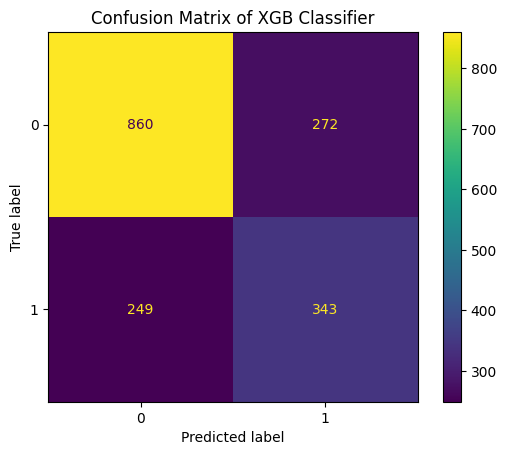

In [83]:
cm = confusion_matrix(y_test, test_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of XGB Classifier')
plt.show()

### Feature importance

Get feature importance using permuation method. In this method, features are dropped and their effect of model score is evaluate. Get the feature importance of each feature and plot them

In [84]:


result = permutation_importance(final_model, X_test, y_test,
                           n_repeats=10,
                           random_state=0)

perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = result.importances_mean
perm['STD_Importance'] = result.importances_std
perm['feature'] = perm.index
perm = perm.sort_values(by=['AVG_Importance'], ascending=False)
perm


,AVG_Importance,STD_Importance,feature
SchemeTypeName_6,0.052552,0.006434,SchemeTypeName_6
ClientAccountDesc_12,0.018561,0.002980,ClientAccountDesc_12
SchemeTypeName_0,0.017865,0.005251,SchemeTypeName_0
Premium,0.014965,0.005270,Premium
SchemeTypeName_5,0.014907,0.001374,SchemeTypeName_5
...,...,...,...
age_appliance_days,-0.004814,0.003678,age_appliance_days
ApplianceCode_38,-0.006032,0.002983,ApplianceCode_38
relFee,-0.006265,0.003279,relFee
PlansCancelledPast5YearCount,-0.009745,0.004253,PlansCancelledPast5YearCount


Text(0.5, 1.0, 'Permutation Importance')

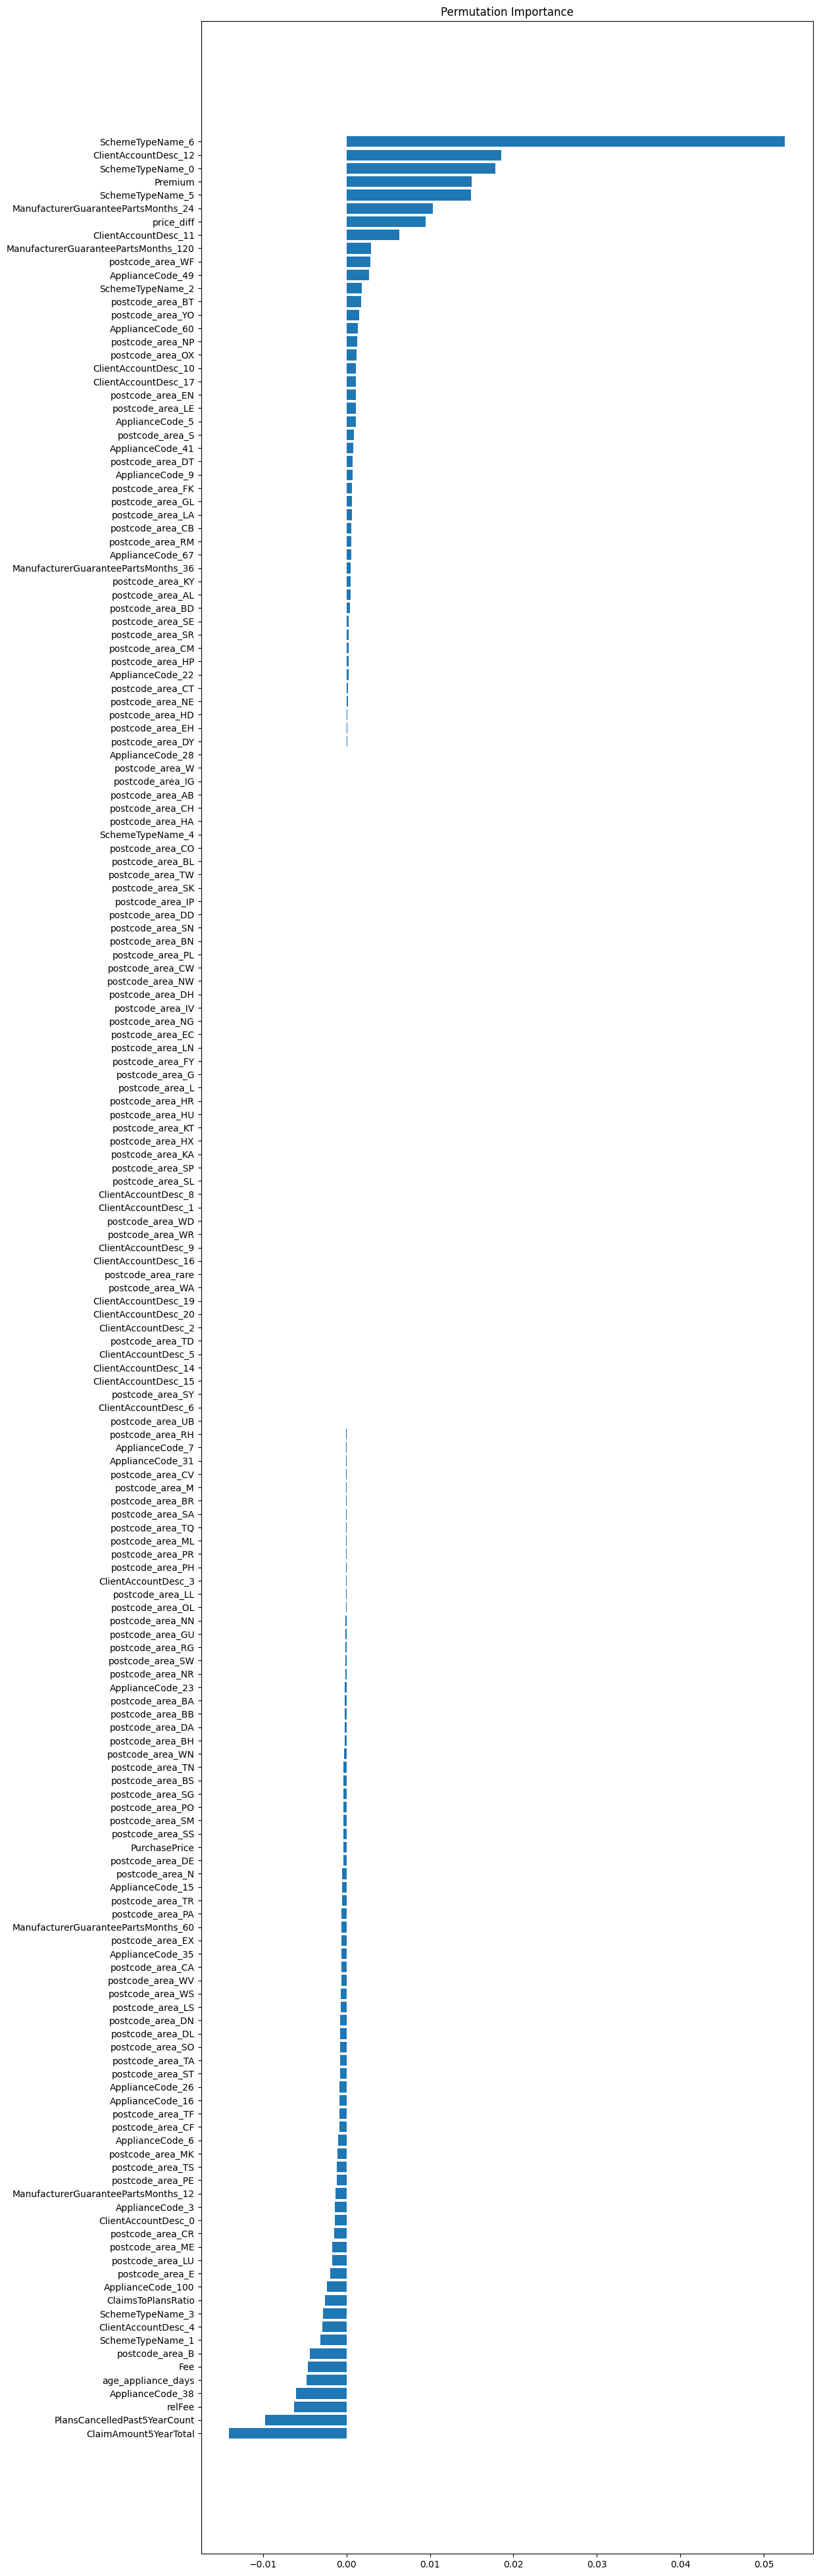

In [85]:
sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(12, 50))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

From the feature importance plots, the most important features are: 

"SchemeTypeName_6"

"price_diff"

"ClientAccountDesc_12"

"Premium"

"SchemeTypeName_0"

### Partial dependence plots

Create partial dependence plots of most important features. This plot shows the change in feature value and its effect on the output predictions of the model. These are plotted for numerical and categorical features

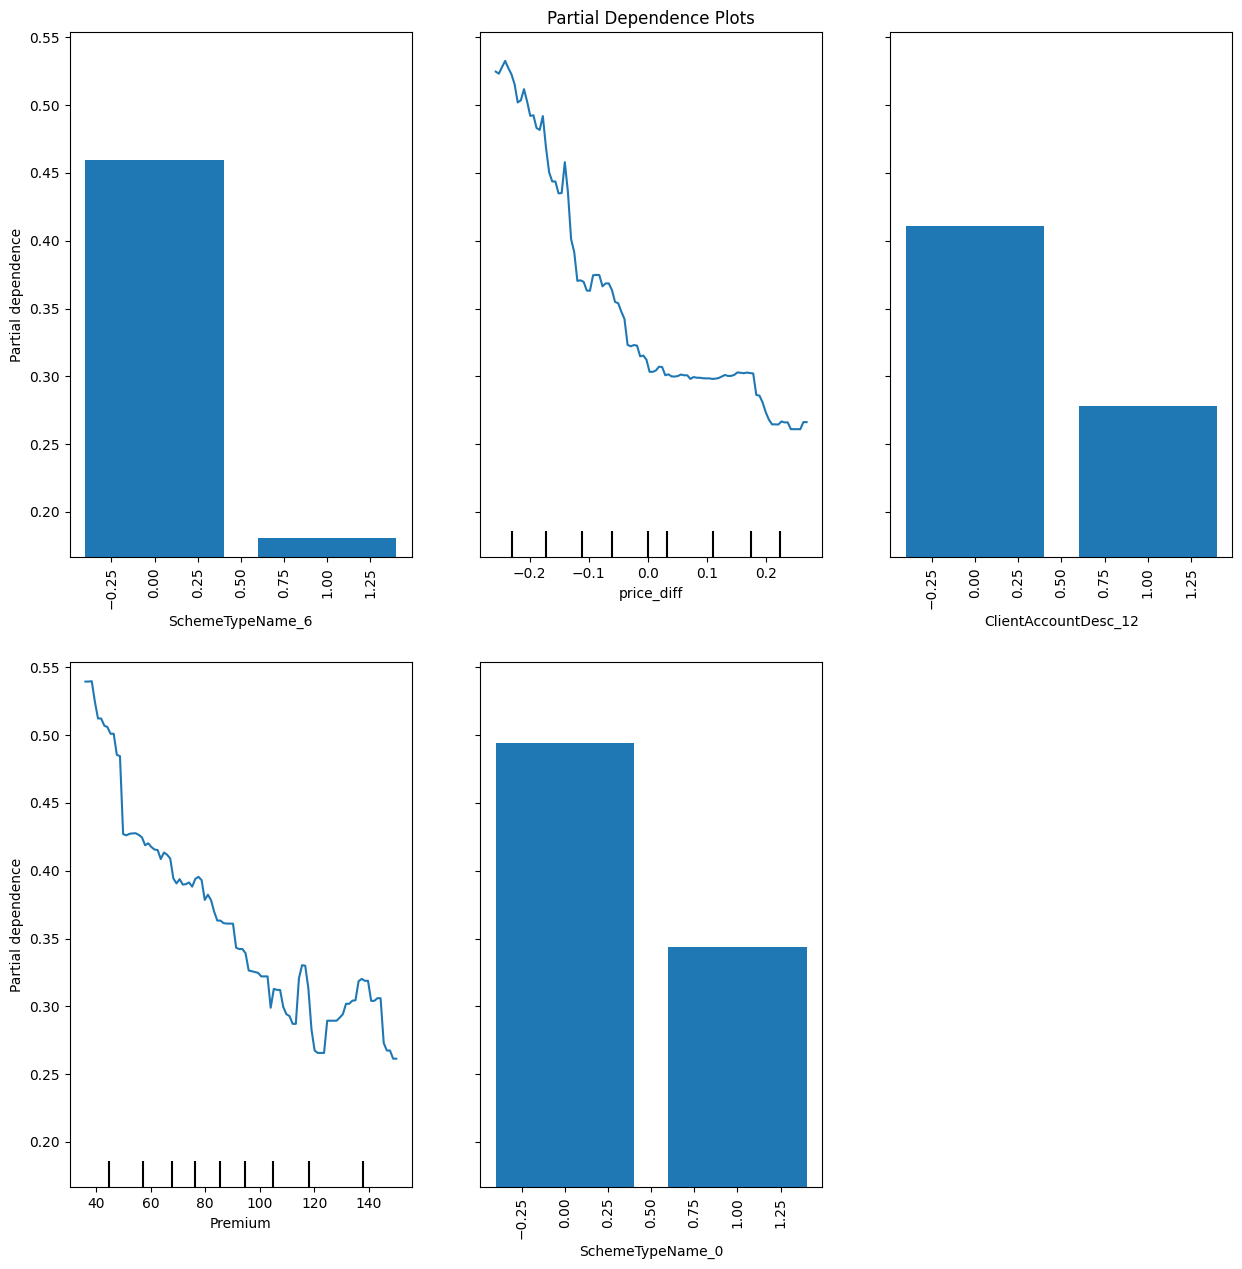

In [86]:

SchemeTypeName_6_index = X.columns.get_loc("SchemeTypeName_6")
price_diff_index = X.columns.get_loc("price_diff")
ClientAccountDesc_12_index = X.columns.get_loc("ClientAccountDesc_12")
Premium_index = X.columns.get_loc("Premium")
SchemeTypeName_0_index = X.columns.get_loc("SchemeTypeName_0")

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=final_model,
    X=X_test,
    features=(SchemeTypeName_6_index,
              price_diff_index,
              ClientAccountDesc_12_index,
              Premium_index,
              SchemeTypeName_0_index
             ), # the features to plot
    categorical_features = (SchemeTypeName_6_index,
                             ClientAccountDesc_12_index,
                             SchemeTypeName_0_index), # categorical features
    random_state=5,
    ax=ax,
)
plt.show()

### Conversion likelihood prediction

Use the final model predict the likelihood of the conversion using X_test data

In [87]:
print(final_model.predict_proba(X_test))

[[0.21617007 0.7838299 ]
 [0.593611   0.40638897]
 [0.9660389  0.0339611 ]
 ...
 [0.32901233 0.67098767]
 [0.13661993 0.8633801 ]
 [0.9858528  0.01414721]]


Create function to calculate conversion. This function takes probability prediction from the model as input and gives conversion percentage as output

In [88]:
def compute_conversion(predict_probabilities, threshold = 0.5):
    # Apply a threshold to get class labels
    
    class_preds = (predict_probabilities > threshold).astype(int)
    accept_list = [row[1] for row in class_preds]
    total_count = len(accept_list)
    one_count = accept_list.count(1)
    conversion_percent = (one_count / total_count) * 100.0
    return conversion_percent

Calculate the percentage conversion from the final model on the X_test data

In [89]:
conversion = compute_conversion(final_model.predict_proba(X_test))
print(f"conversion percent: {conversion}")

conversion percent: 35.672853828306266


### Hyperparameter tuning

Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

In this process, we train the model with various possible range of parameters until a best fit model is obtained.

Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.

Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

The optimization process consists of 4 parts which are as follows-

1. Initialize domain space
The domain space is the input values over which we want to search.

2. Define objective function
The objective function can be any function which returns a real value that we want to minimize. In this case, we want to minimize the validation error of a machine learning model with respect to the hyperparameters. If the real value is accuracy, then we want to maximize it. Then the function should return the negative of that metric.

3. Optimization algorithm
It is the method used to construct the surrogate objective function and choose the next values to evaluate.

4. Results
Results are score or value pairs that the algorithm uses to build the model.

An example of hyperparameter tuning. The tuning is ran only for 15 iterations in the interest of saving time. For real-scenarios, the tuning is run for much higher number of iterations in order to get best parameters for the model.

In [90]:


# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 18, dtype=int)),
    'gamma': hp.uniform ('gamma', 1,9),
    'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 180,
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'seed': 0,
    'subsample': hp.uniform('subsample', 0.5, 1)
}

# Define the objective function to minimize
def objective(params):
    xgb_model = XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=15)
print("Best set of hyperparameters: ", best_params)

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004000 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  7%|▋         | 1/15 [00:00<00:08,  1.65trial/s, best loss: -0.6885150812064965]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004014 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.688515


 13%|█▎        | 2/15 [00:01<00:07,  1.79trial/s, best loss: -0.6885150812064965]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004012 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.688515


 20%|██        | 3/15 [00:01<00:07,  1.58trial/s, best loss: -0.7064965197215777]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004013 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.706497


 27%|██▋       | 4/15 [00:02<00:07,  1.55trial/s, best loss: -0.7064965197215777]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004015 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.706497


 33%|███▎      | 5/15 [00:03<00:05,  1.68trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002007 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.715197


 40%|████      | 6/15 [00:03<00:05,  1.61trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005205 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.715197


 47%|████▋     | 7/15 [00:04<00:04,  1.69trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004268 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.715197


 53%|█████▎    | 8/15 [00:04<00:04,  1.58trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004489 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.715197


 60%|██████    | 9/15 [00:05<00:04,  1.47trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004014 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.715197


 67%|██████▋   | 10/15 [00:06<00:03,  1.53trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004012 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.715197


 73%|███████▎  | 11/15 [00:07<00:02,  1.51trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004013 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.715197


 80%|████████  | 12/15 [00:07<00:01,  1.60trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004011 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.715197


 87%|████████▋ | 13/15 [00:08<00:01,  1.51trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004014 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.715197


 93%|█████████▎| 14/15 [00:08<00:00,  1.58trial/s, best loss: -0.7151972157772621]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004016 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.715197


100%|██████████| 15/15 [00:09<00:00,  1.58trial/s, best loss: -0.7151972157772621]
Best set of hyperparameters:  {'colsample_bytree': 0.966988926470683, 'gamma': 8.120839308638466, 'learning_rate': 0.13274962916151511, 'max_depth': 9, 'min_child_weight': 4.0, 'reg_alpha': 92.0, 'subsample': 0.8983603296772666}


### Effect on conversion if premium is increased by 10%

In [91]:
X_test.head()

,postcode_area_AB,postcode_area_AL,postcode_area_B,postcode_area_BA,postcode_area_BB,postcode_area_BD,postcode_area_BH,postcode_area_BL,postcode_area_BN,postcode_area_BR,postcode_area_BS,postcode_area_BT,postcode_area_CA,postcode_area_CB,postcode_area_CF,postcode_area_CH,postcode_area_CM,postcode_area_CO,postcode_area_CR,postcode_area_CT,postcode_area_CV,postcode_area_CW,postcode_area_DA,postcode_area_DD,postcode_area_DE,postcode_area_DH,postcode_area_DL,postcode_area_DN,postcode_area_DT,postcode_area_DY,postcode_area_E,postcode_area_EC,postcode_area_EH,postcode_area_EN,postcode_area_EX,postcode_area_FK,postcode_area_FY,postcode_area_G,postcode_area_GL,postcode_area_GU,postcode_area_HA,postcode_area_HD,postcode_area_HP,postcode_area_HR,postcode_area_HU,postcode_area_HX,postcode_area_IG,postcode_area_IP,postcode_area_IV,postcode_area_KA,postcode_area_KT,postcode_area_KY,postcode_area_L,postcode_area_LA,postcode_area_LE,postcode_area_LL,postcode_area_LN,postcode_area_LS,postcode_area_LU,postcode_area_M,postcode_area_ME,postcode_area_MK,postcode_area_ML,postcode_area_N,postcode_area_NE,postcode_area_NG,postcode_area_NN,postcode_area_NP,postcode_area_NR,postcode_area_NW,postcode_area_OL,postcode_area_OX,postcode_area_PA,postcode_area_PE,postcode_area_PH,postcode_area_PL,postcode_area_PO,postcode_area_PR,postcode_area_RG,postcode_area_RH,postcode_area_RM,postcode_area_S,postcode_area_SA,postcode_area_SE,postcode_area_SG,postcode_area_SK,postcode_area_SL,postcode_area_SM,postcode_area_SN,postcode_area_SO,postcode_area_SP,postcode_area_SR,postcode_area_SS,postcode_area_ST,postcode_area_SW,postcode_area_SY,postcode_area_TA,postcode_area_TD,postcode_area_TF,postcode_area_TN,postcode_area_TQ,postcode_area_TR,postcode_area_TS,postcode_area_TW,postcode_area_UB,postcode_area_W,postcode_area_WA,postcode_area_WD,postcode_area_WF,postcode_area_WN,postcode_area_WR,postcode_area_WS,postcode_area_WV,postcode_area_YO,postcode_area_rare,ApplianceCode_3,ApplianceCode_5,ApplianceCode_6,ApplianceCode_7,ApplianceCode_9,ApplianceCode_15,ApplianceCode_16,ApplianceCode_22,ApplianceCode_23,ApplianceCode_26,ApplianceCode_28,ApplianceCode_31,ApplianceCode_35,ApplianceCode_38,ApplianceCode_41,ApplianceCode_49,ApplianceCode_60,ApplianceCode_67,ApplianceCode_100,ClientAccountDesc_0,ClientAccountDesc_1,ClientAccountDesc_2,ClientAccountDesc_3,ClientAccountDesc_4,ClientAccountDesc_5,ClientAccountDesc_6,ClientAccountDesc_8,ClientAccountDesc_9,ClientAccountDesc_10,ClientAccountDesc_11,ClientAccountDesc_12,ClientAccountDesc_14,ClientAccountDesc_15,ClientAccountDesc_16,ClientAccountDesc_17,ClientAccountDesc_19,ClientAccountDesc_20,SchemeTypeName_0,SchemeTypeName_1,SchemeTypeName_2,SchemeTypeName_3,SchemeTypeName_4,SchemeTypeName_5,SchemeTypeName_6,ManufacturerGuaranteePartsMonths_12,ManufacturerGuaranteePartsMonths_24,ManufacturerGuaranteePartsMonths_36,ManufacturerGuaranteePartsMonths_60,ManufacturerGuaranteePartsMonths_120,ClaimAmount5YearTotal,ClaimsToPlansRatio,PlansCancelledPast5YearCount,Fee,Premium,PurchasePrice,age_appliance_days,price_diff,relFee
8104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.000000,-0.000000,-0.000000,1.018868,150.00,1200.00,327.0,0.137398,13.332196
3925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.000000,-0.000000,1.071694,-1.218329,24.72,159.99,86.0,-0.234201,4.956320
1617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Calculate the conversion before Premium increase

In [92]:
conversion_before = compute_conversion(final_model.predict_proba(X_test))

Increase Premium by 10 percent

In [93]:
percentage_increase = 10
X_test['Premium'] += (X_test['Premium'] * percentage_increase/100)

In [94]:
X_test.head()

,postcode_area_AB,postcode_area_AL,postcode_area_B,postcode_area_BA,postcode_area_BB,postcode_area_BD,postcode_area_BH,postcode_area_BL,postcode_area_BN,postcode_area_BR,postcode_area_BS,postcode_area_BT,postcode_area_CA,postcode_area_CB,postcode_area_CF,postcode_area_CH,postcode_area_CM,postcode_area_CO,postcode_area_CR,postcode_area_CT,postcode_area_CV,postcode_area_CW,postcode_area_DA,postcode_area_DD,postcode_area_DE,postcode_area_DH,postcode_area_DL,postcode_area_DN,postcode_area_DT,postcode_area_DY,postcode_area_E,postcode_area_EC,postcode_area_EH,postcode_area_EN,postcode_area_EX,postcode_area_FK,postcode_area_FY,postcode_area_G,postcode_area_GL,postcode_area_GU,postcode_area_HA,postcode_area_HD,postcode_area_HP,postcode_area_HR,postcode_area_HU,postcode_area_HX,postcode_area_IG,postcode_area_IP,postcode_area_IV,postcode_area_KA,postcode_area_KT,postcode_area_KY,postcode_area_L,postcode_area_LA,postcode_area_LE,postcode_area_LL,postcode_area_LN,postcode_area_LS,postcode_area_LU,postcode_area_M,postcode_area_ME,postcode_area_MK,postcode_area_ML,postcode_area_N,postcode_area_NE,postcode_area_NG,postcode_area_NN,postcode_area_NP,postcode_area_NR,postcode_area_NW,postcode_area_OL,postcode_area_OX,postcode_area_PA,postcode_area_PE,postcode_area_PH,postcode_area_PL,postcode_area_PO,postcode_area_PR,postcode_area_RG,postcode_area_RH,postcode_area_RM,postcode_area_S,postcode_area_SA,postcode_area_SE,postcode_area_SG,postcode_area_SK,postcode_area_SL,postcode_area_SM,postcode_area_SN,postcode_area_SO,postcode_area_SP,postcode_area_SR,postcode_area_SS,postcode_area_ST,postcode_area_SW,postcode_area_SY,postcode_area_TA,postcode_area_TD,postcode_area_TF,postcode_area_TN,postcode_area_TQ,postcode_area_TR,postcode_area_TS,postcode_area_TW,postcode_area_UB,postcode_area_W,postcode_area_WA,postcode_area_WD,postcode_area_WF,postcode_area_WN,postcode_area_WR,postcode_area_WS,postcode_area_WV,postcode_area_YO,postcode_area_rare,ApplianceCode_3,ApplianceCode_5,ApplianceCode_6,ApplianceCode_7,ApplianceCode_9,ApplianceCode_15,ApplianceCode_16,ApplianceCode_22,ApplianceCode_23,ApplianceCode_26,ApplianceCode_28,ApplianceCode_31,ApplianceCode_35,ApplianceCode_38,ApplianceCode_41,ApplianceCode_49,ApplianceCode_60,ApplianceCode_67,ApplianceCode_100,ClientAccountDesc_0,ClientAccountDesc_1,ClientAccountDesc_2,ClientAccountDesc_3,ClientAccountDesc_4,ClientAccountDesc_5,ClientAccountDesc_6,ClientAccountDesc_8,ClientAccountDesc_9,ClientAccountDesc_10,ClientAccountDesc_11,ClientAccountDesc_12,ClientAccountDesc_14,ClientAccountDesc_15,ClientAccountDesc_16,ClientAccountDesc_17,ClientAccountDesc_19,ClientAccountDesc_20,SchemeTypeName_0,SchemeTypeName_1,SchemeTypeName_2,SchemeTypeName_3,SchemeTypeName_4,SchemeTypeName_5,SchemeTypeName_6,ManufacturerGuaranteePartsMonths_12,ManufacturerGuaranteePartsMonths_24,ManufacturerGuaranteePartsMonths_36,ManufacturerGuaranteePartsMonths_60,ManufacturerGuaranteePartsMonths_120,ClaimAmount5YearTotal,ClaimsToPlansRatio,PlansCancelledPast5YearCount,Fee,Premium,PurchasePrice,age_appliance_days,price_diff,relFee
8104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.000000,-0.000000,-0.000000,1.018868,165.000,1200.00,327.0,0.137398,13.332196
3925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.000000,-0.000000,1.071694,-1.218329,27.192,159.99,86.0,-0.234201,4.956320
1617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Calculate conversion after increaes in Premium

In [95]:

conversion_after = compute_conversion(final_model.predict_proba(X_test))
print(f"conversion before: {conversion_before}")
print(f"conversion after: {conversion_after}")


conversion before: 35.672853828306266
conversion after: 33.75870069605568


Function to calculate percentage change in conversion

In [96]:
def calculate_conversion_change(conversion_original, conversion_new):
    diff = conversion_original - conversion_new
    change = diff / conversion_original 
    change_percentage = change * 100
    return change_percentage


In [97]:
print(calculate_conversion_change(conversion_before, conversion_after))

5.365853658536592


Increaes in Premium by 10 percent results in decrease in conversion by 5.36 percent